# Buy or Sell
Testing known methods on Microsoft, Apple and HP Stockprice to see if they work. Obviously just using 3 Stocks is not statisticly significant, but testing it on hundreds or thousands of stocks takes to long.

# Imports

In [1]:
import math
import pandas as pd
import numpy as np

import pandas_datareader as web

#plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

print("Import successful")

#if you don't like the warnings
# import warnings
# warnings.filterwarnings("ignore")

Import successful


# Data

Microsoft

In [2]:
dfMS=web.DataReader("MS", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfMS.drop(["High", "Low", "Open", "Volume", "Adj Close"], axis=1, inplace=True)
dfMS.head()

,Close
Date,
2010-01-04,30.910000
2010-01-05,32.040001
2010-01-06,32.450001
2010-01-07,32.919998
2010-01-08,32.250000


Text(0, 0.5, 'Close Prtice USD ($)')

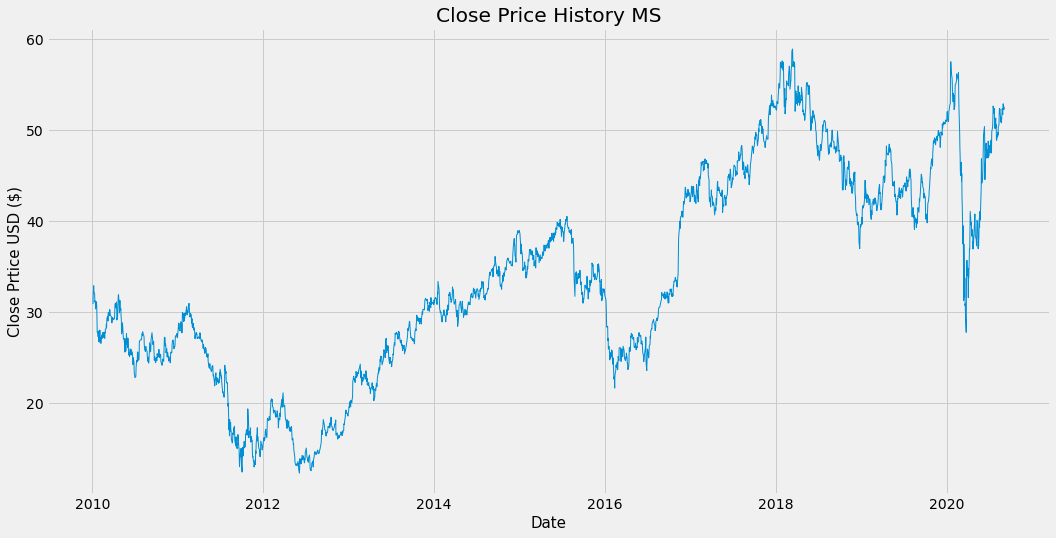

In [3]:
plt.figure(figsize=(16,8))
plt.title("Close Price History MS")
plt.plot(dfMS["Close"],linewidth=1)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)

Apple

In [4]:
dfA=web.DataReader("AAPL", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfA.drop(["High", "Low", "Open", "Volume", "Adj Close"], axis=1, inplace=True)
dfA.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656428
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


Text(0, 0.5, 'Close Prtice USD ($)')

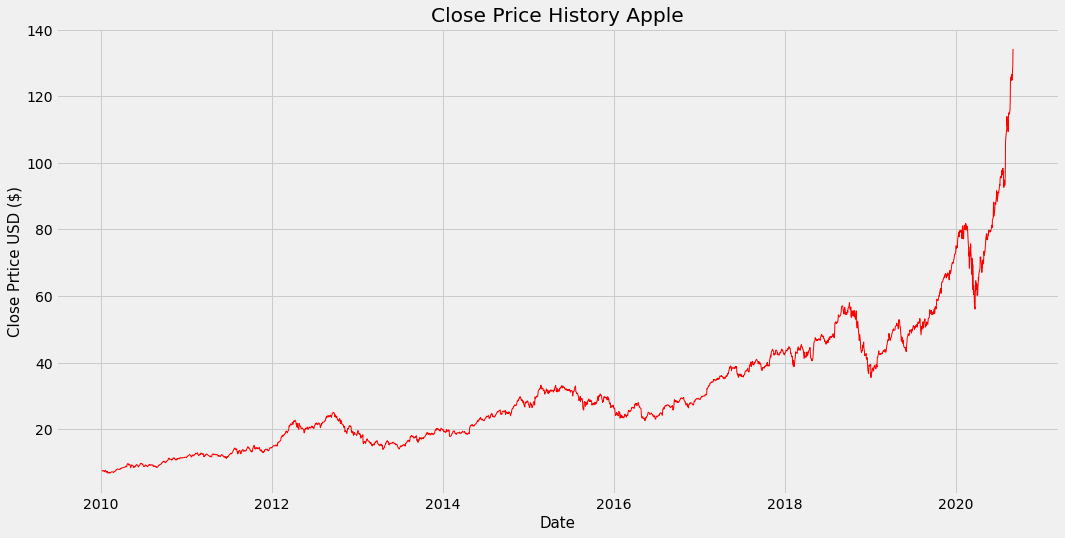

In [5]:
plt.figure(figsize=(16,8))
plt.title("Close Price History Apple")
plt.plot(dfA["Close"],linewidth=1, color="red")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)

HP

In [6]:
dfHP=web.DataReader("HP", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfHP.drop(["High", "Low", "Open", "Volume", "Adj Close"], axis=1, inplace=True)
dfHP.head()

,Close
Date,
2010-01-04,41.980000
2010-01-05,44.430000
2010-01-06,46.049999
2010-01-07,46.340000
2010-01-08,48.000000


Text(0, 0.5, 'Close Prtice USD ($)')

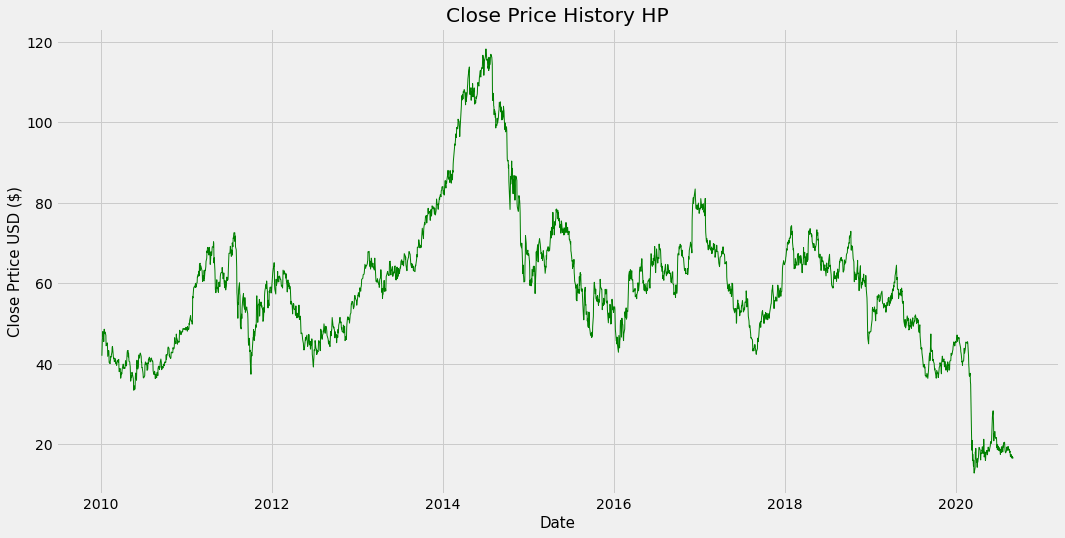

In [7]:
plt.figure(figsize=(16,8))
plt.title("Close Price History HP")
plt.plot(dfHP["Close"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)

all Data

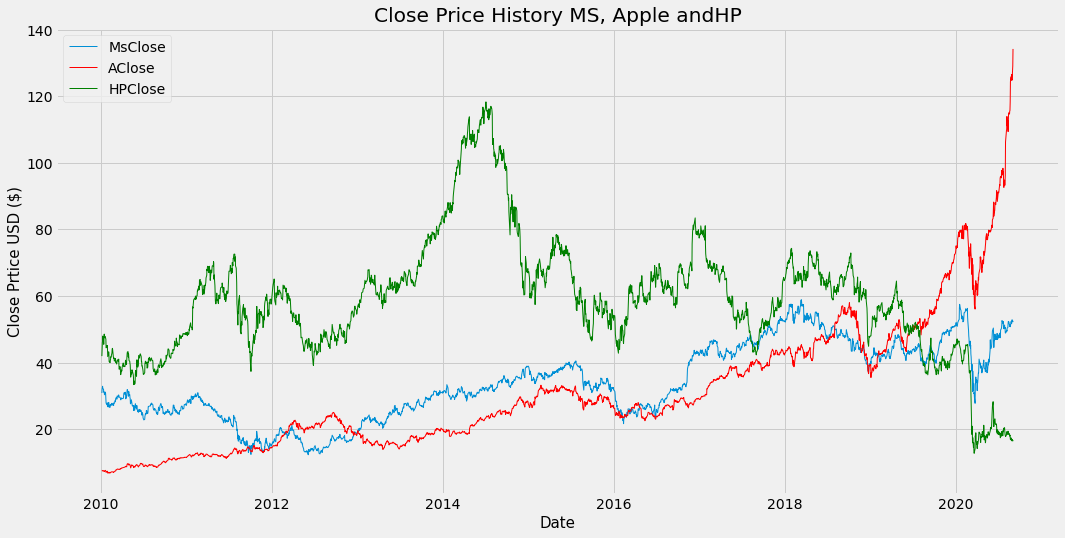

In [8]:
plt.figure(figsize=(16,8))
plt.title("Close Price History MS, Apple andHP")
plt.plot(dfMS["Close"],linewidth=1)
plt.plot(dfA["Close"],linewidth=1, color="red")
plt.plot(dfHP["Close"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsClose","AClose","HPClose"], loc="upper left")

It is easy to see, that the stocks don't perform the same, which is good, because I want to test the Methods on different data.

# Methods
searching methods online and testing them.
1. How to Interpret and Use Moving Averages in Trading

# 1. How to Interpret and Use Moving Averages in Trading
https://www.dummies.com/personal-finance/investing/stocks-trading/how-to-interpret-and-use-moving-averages-in-trading/

"One simple mechanical strategy that some traders employ works like this:

- Buy when the moving average slopes upward and the closing price crosses above the moving average.

- Close the position when the price closes below the moving average.

- Sell short when the moving average slopes downward and the closing price crosses below the moving average.

- Close the short position when the price closes above the moving average.
"

Notes:
- Not sure how long the SMA is(found 5 days, 30, 60...) and performance should vary if we change the length

# 1.1 Microsoft

In [9]:
dfMSSMA=dfMS.copy()

In [10]:
for i in range(30+1,dfMSSMA.shape[0]):#SMA with 15 days
    dfMSSMA.loc[dfMSSMA.index[i],'SMA15'] = ((dfMSSMA.Close[i-15:i].sum())/15)
for i in range(30+1,dfMSSMA.shape[0]):#SMA with 30 days
    dfMSSMA.loc[dfMSSMA.index[i],'SMA30'] = ((dfMSSMA.Close[i-30:i].sum())/30)

In [11]:
dfMSSMA.head()

,Close,SMA15,SMA30
Date,,,
2010-01-04,30.910000,NaN,NaN
2010-01-05,32.040001,NaN,NaN
2010-01-06,32.450001,NaN,NaN
2010-01-07,32.919998,NaN,NaN
2010-01-08,32.250000,NaN,NaN


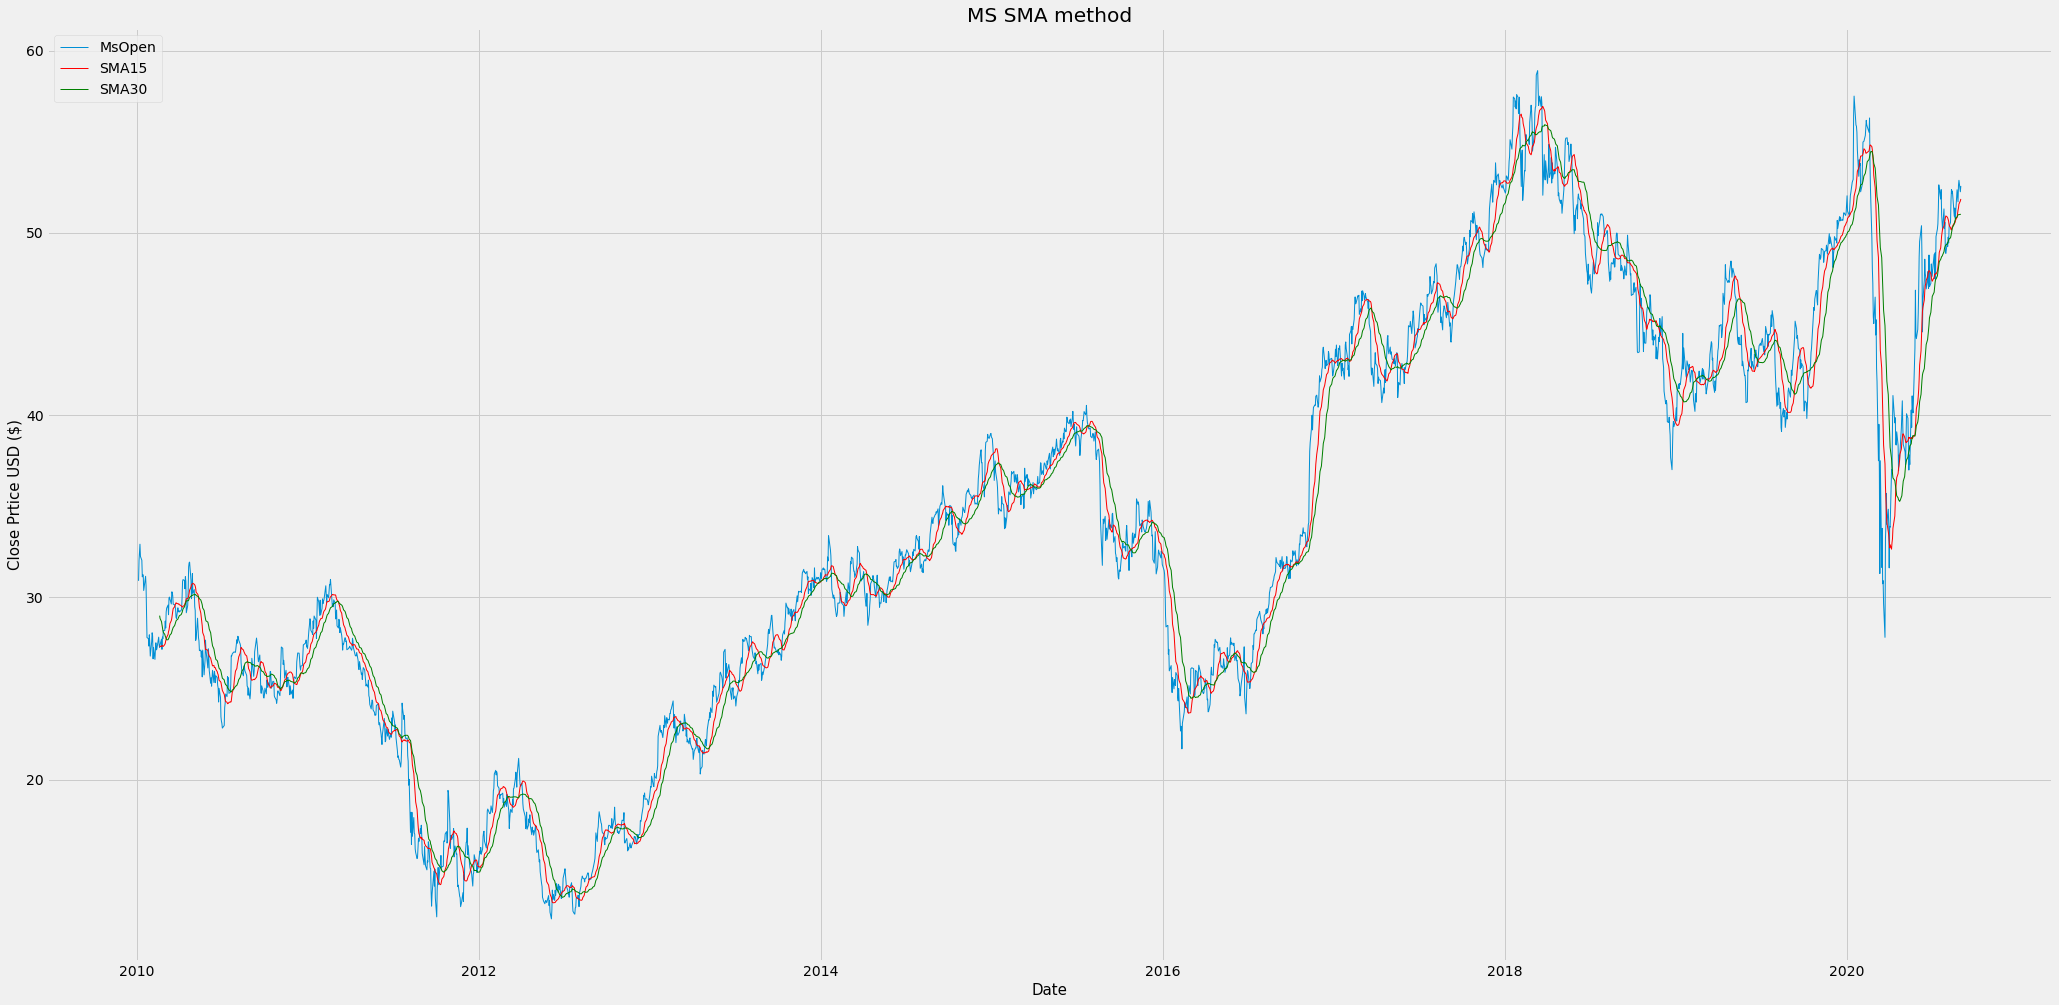

In [12]:
plt.figure(figsize=(16*2,8*2))
plt.title("MS SMA method")
plt.plot(dfMSSMA["Close"],linewidth=1)
plt.plot(dfMSSMA["SMA15"],linewidth=1, color="red")
plt.plot(dfMSSMA["SMA30"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","SMA30"], loc="upper left") # hard to see because it is a long timespan

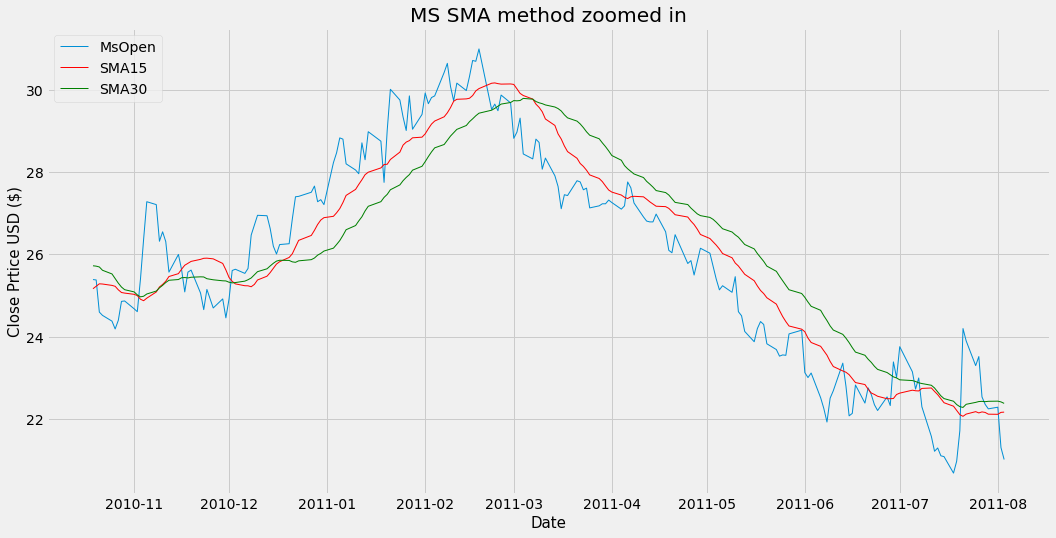

In [13]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in")
plt.plot(dfMSSMA["Close"][200:400],linewidth=1)
plt.plot(dfMSSMA["SMA15"][200:400],linewidth=1, color="red")
plt.plot(dfMSSMA["SMA30"][200:400],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","SMA30"], loc="upper left") #zommed in

Both SMA seem to behave similarly, but there is still a difference

# SMA15

In [14]:
def SMA15BuyAlg(df):
    start=36
    buy=[]
    sell=[]
    short=[]
    buyback=[]
    for _ in range(start):
        buyback.append(np.nan)
        buy.append(np.nan)
        sell.append(np.nan)
        short.append(np.nan)
    above=None # 1 above -1 below
    for i in range(start,df.shape[0]):
        #Buy when the moving average slopes upward(decided arbitrarily 5 days as info not clear) and the closing price crosses above the moving average.
        if (df.SMA15[i]>df.SMA15[i-1]>df.SMA15[i-2]>df.SMA15[i-3]>df.SMA15[i-4] 
            and above!=1 and df.SMA15[i]>df.Close[i]):
                buy.append(df.Close[i])
                sell.append(np.nan)
                short.append(np.nan)
                buyback.append(np.nan)
                above=1
                
        #Close the position when the price closes below the moving average.        
        elif (above==1 and df.SMA15[i]>df.Close[i]):
            sell.append(df.Close[i])
            buy.append(np.nan)
            short.append(np.nan)
            buyback.append(np.nan)
            above=0
            
        #Sell short when the moving average slopes downward and the closing price crosses below the moving average.
        elif (df.SMA15[i]<df.SMA15[i-1]<df.SMA15[i-2]<df.SMA15[i-3]<df.SMA15[i-4] 
            and above!=-1 and df.SMA15[i]<df.Close[i]):
                short.append(df.Close[i])
                buy.append(np.nan)
                sell.append(np.nan)
                buyback.append(np.nan)
                above=-1
        #Close the short position when the price closes above the moving average.
        elif (above==-1 and df.SMA15[i]<df.Close[i]):
            buyback.append(df.Close[i])
            buy.append(np.nan)
            sell.append(np.nan)
            short.append(np.nan)
            above=0
        #do nothing
        else:
            buyback.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            short.append(np.nan)
        
    
    return buy, sell, short, buyback

In [15]:
MSSMA15Buy, MSSMA15Sell, MSSMA15Short, MSSMA15Buyback=SMA15BuyAlg(dfMSSMA)

In [16]:
dfMSSMA["15Buy"]=MSSMA15Buy
dfMSSMA["15Sell"]=MSSMA15Sell
dfMSSMA["15Short"]=MSSMA15Short
dfMSSMA["15Buyback"]=MSSMA15Buyback
dfMSSMA.head()

,Close,SMA15,SMA30,15Buy,15Sell,15Short,15Buyback
Date,,,,,,,
2010-01-04,30.910000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,32.040001,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,32.450001,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,32.919998,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,32.250000,NaN,NaN,NaN,NaN,NaN,NaN


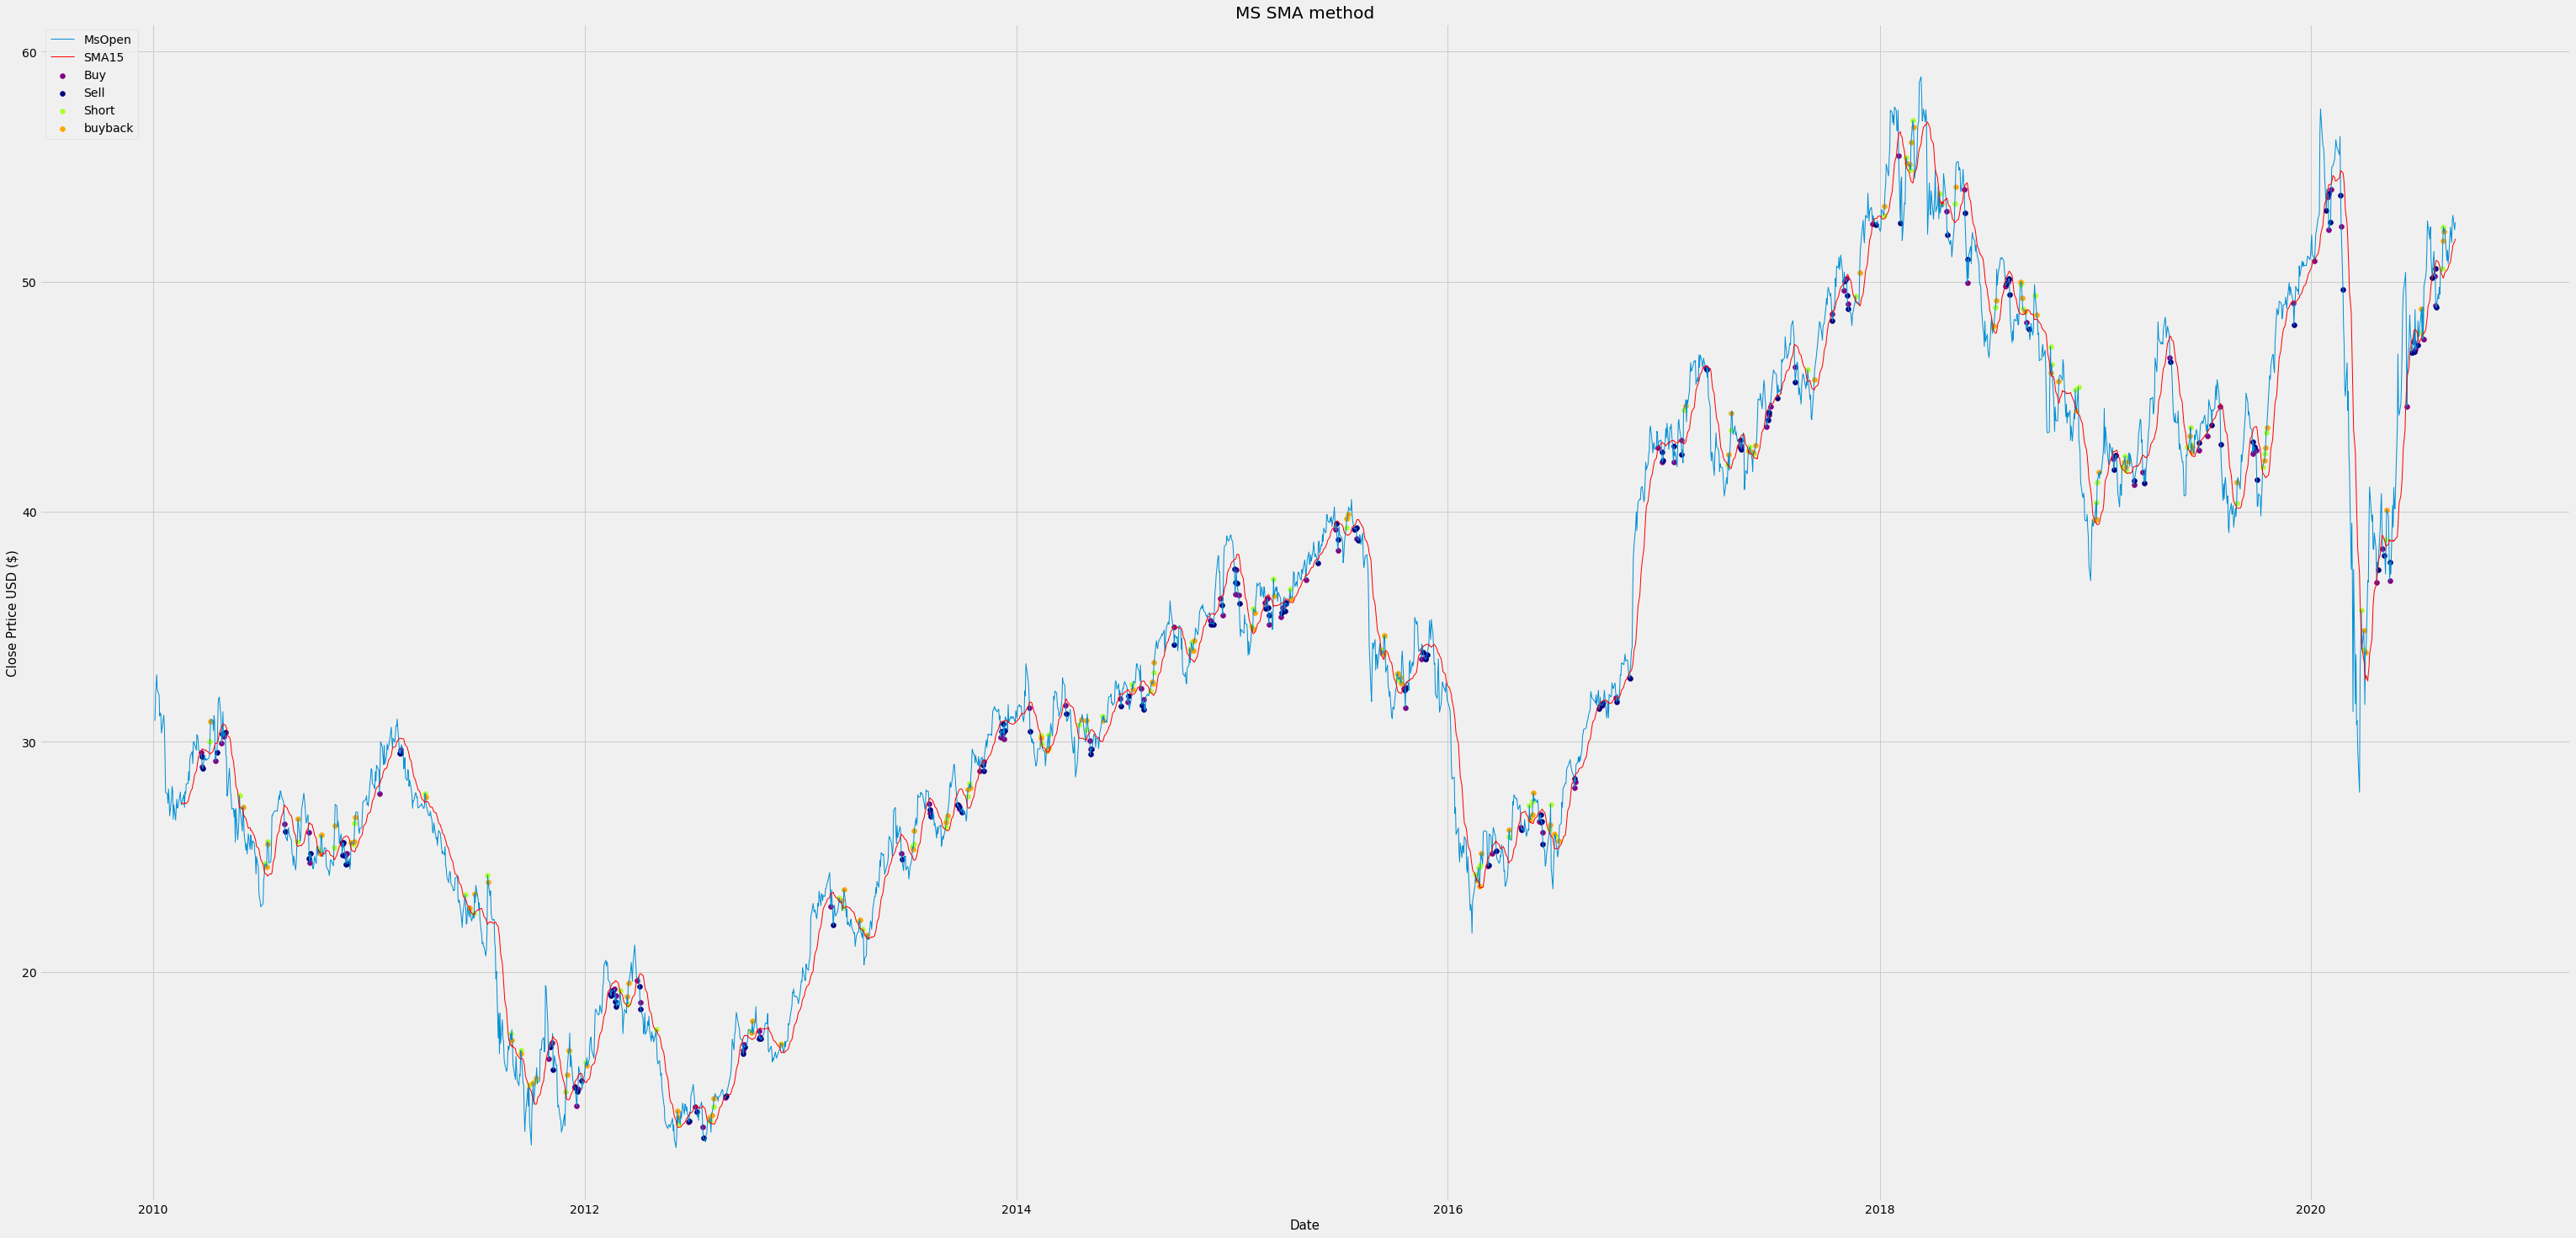

In [17]:
plt.figure(figsize=(16*3,8*3))
plt.title("MS SMA method")

plt.plot(dfMSSMA["Close"],linewidth=1)
plt.plot(dfMSSMA["SMA15"],linewidth=1, color="red")

plt.scatter(dfMSSMA.index,dfMSSMA["15Buy"], color="purple")
plt.scatter(dfMSSMA.index,dfMSSMA["15Sell"], color="navy")
plt.scatter(dfMSSMA.index,dfMSSMA["15Short"], color="greenyellow")
plt.scatter(dfMSSMA.index,dfMSSMA["15Buyback"], color="orange")

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

it's impossible to see stuff, so i will make smaller plots to analyze

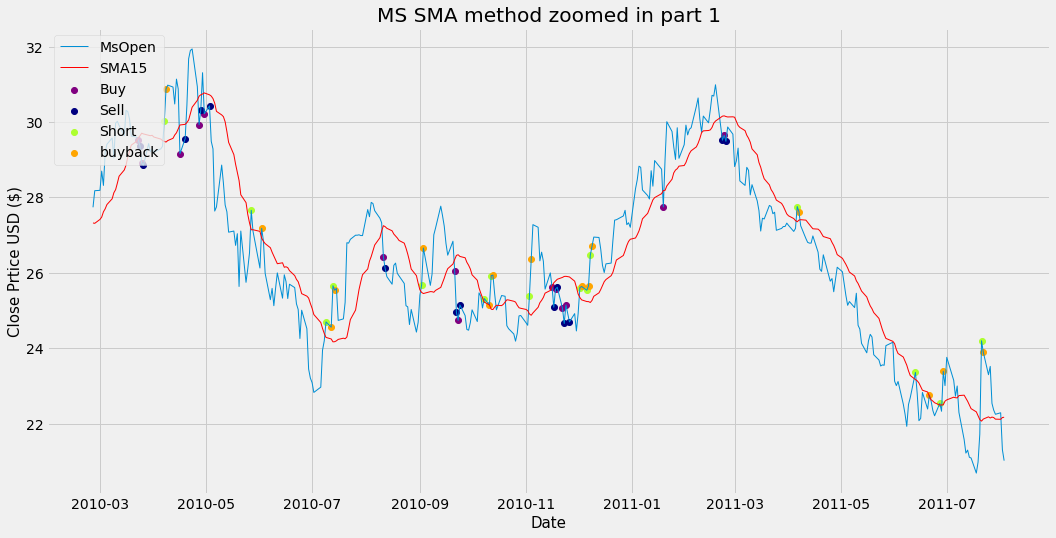

In [18]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 1")

plt.plot(dfMSSMA["Close"][36:400],linewidth=1)
plt.plot(dfMSSMA["SMA15"][36:400],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Buy"][36:400], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Sell"][36:400], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Short"][36:400], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Buyback"][36:400], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

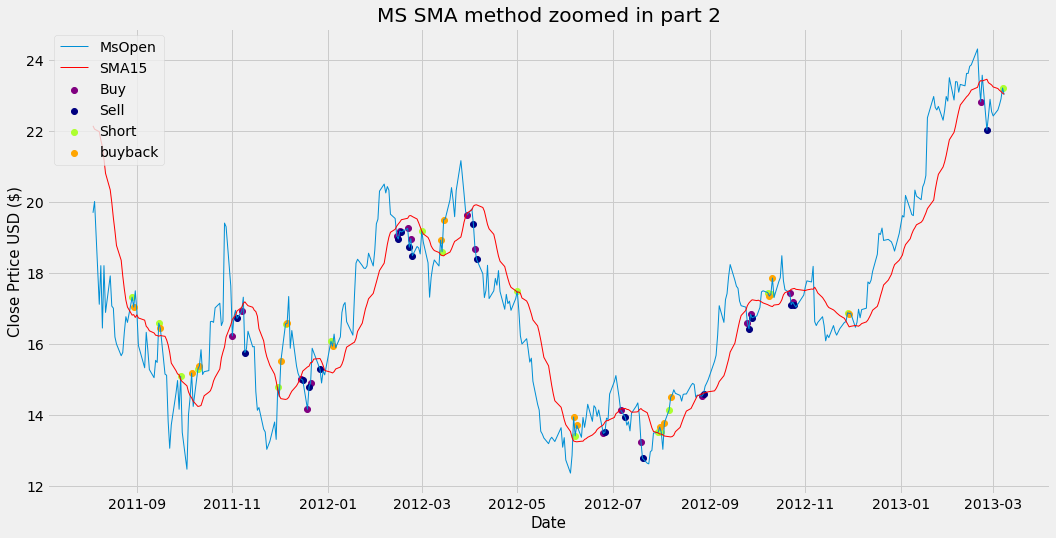

In [19]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 2")

plt.plot(dfMSSMA["Close"][400:800],linewidth=1)
plt.plot(dfMSSMA["SMA15"][400:800],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Buy"][400:800], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Sell"][400:800], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Short"][400:800], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Buyback"][400:800], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

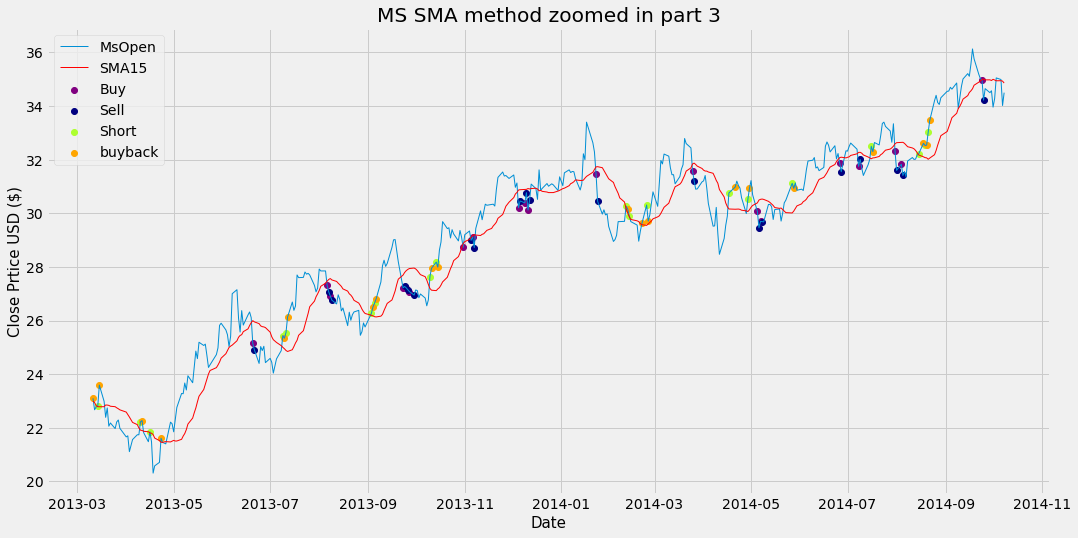

In [20]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 3")

plt.plot(dfMSSMA["Close"][800:1200],linewidth=1)
plt.plot(dfMSSMA["SMA15"][800:1200],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Buy"][800:1200], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Sell"][800:1200], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Short"][800:1200], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Buyback"][800:1200], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

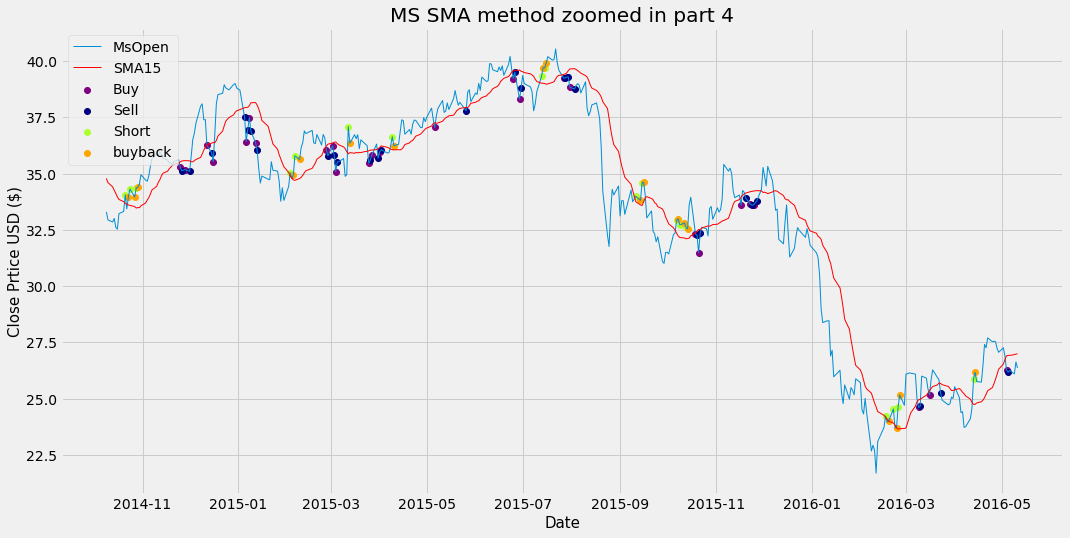

In [21]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 4")

plt.plot(dfMSSMA["Close"][1200:1600],linewidth=1)
plt.plot(dfMSSMA["SMA15"][1200:1600],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Buy"][1200:1600], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Sell"][1200:1600], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Short"][1200:1600], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Buyback"][1200:1600], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

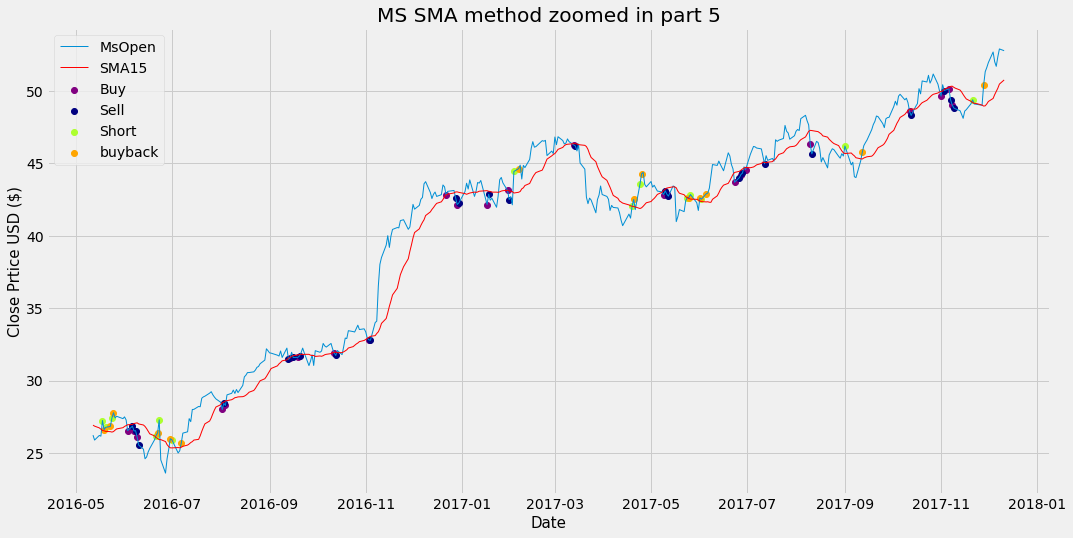

In [22]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 5")

plt.plot(dfMSSMA["Close"][1600:2000],linewidth=1)
plt.plot(dfMSSMA["SMA15"][1600:2000],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Buy"][1600:2000], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Sell"][1600:2000], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Short"][1600:2000], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Buyback"][1600:2000], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

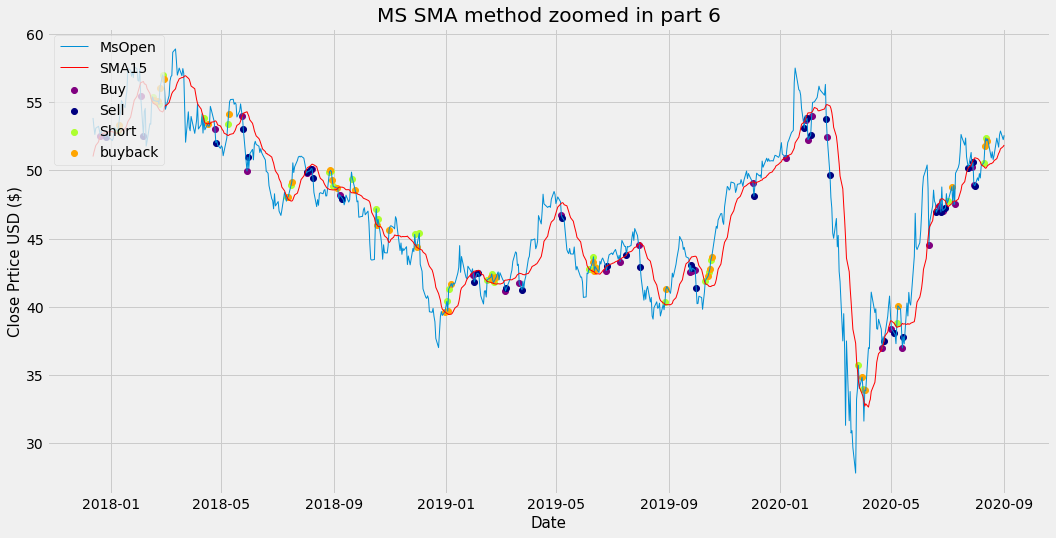

In [23]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 6")

plt.plot(dfMSSMA["Close"][2000:],linewidth=1)
plt.plot(dfMSSMA["SMA15"][2000:],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Buy"][2000:], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Sell"][2000:], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Short"][2000:], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Buyback"][2000:], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

Just from looking at the diagramms(which is hard) it does not seem, like this method is very successful.

In [24]:
def createLog15(df):# creating a shortened log of the price when we bought/sold...
    bought=[df.Close[x] for x in df.index if not math.isnan(df["15Buy"][x])]
    sold=[df.Close[x] for x in df.index if not math.isnan(df["15Sell"][x])]
    shorted=[df.Close[x] for x in df.index if not math.isnan(df["15Short"][x])]
    boughtback=[df.Close[x] for x in df.index if not math.isnan(df["15Buyback"][x])]
    return bought, sold, shorted, boughtback

In [25]:
MSBought, MSSold, MSShorted, MSBoughtback=createLog15(dfMSSMA)

In [26]:
print(len(MSBought), len(MSSold),len(MSShorted), len(MSBoughtback))
#everything we bought, we also sold, but in theory we could have 1 stock at the end of the timespan

140 140 119 119


In [27]:
made=0
for i in range(len(MSSold)):
    made+=(MSBought[i]-MSSold[i])
made # the amount we gained/lost

3.4500017166137695

In [28]:
made2=0
for i in range(len(MSBoughtback)):
    made2+=(MSShorted[i]-MSBoughtback[i])
made2 # the amount we gained/lost

3.660013198852539

In [29]:
netgain=made+made2
print("we gained {:.2f} $ using this method".format(netgain))

we gained 7.11 $ using this method


This amount is horrible for the effort, especially if we have to play a fee whenever we trade.<br>
Now we also test the same method using SMA30.

# SMA30

In [30]:
def SMA30BuyAlg(df):
    start=36
    buy=[]
    sell=[]
    short=[]
    buyback=[]
    for _ in range(start):
        buyback.append(np.nan)
        buy.append(np.nan)
        sell.append(np.nan)
        short.append(np.nan)
    above=None # 1 above -1 below
    for i in range(start,df.shape[0]):
        #Buy when the moving average slopes upward(decided arbitrarily 5 days as info not clear) and the closing price crosses above the moving average.
        if (df.SMA30[i]>df.SMA30[i-1]>df.SMA30[i-2]>df.SMA30[i-3]>df.SMA30[i-4] 
            and above!=1 and df.SMA30[i]>df.Close[i]):
                buy.append(df.Close[i])
                sell.append(np.nan)
                short.append(np.nan)
                buyback.append(np.nan)
                above=1
                
        #Close the position when the price closes below the moving average.        
        elif (above==1 and df.SMA30[i]>df.Close[i]):
            sell.append(df.Close[i])
            buy.append(np.nan)
            short.append(np.nan)
            buyback.append(np.nan)
            above=0
            
        #Sell short when the moving average slopes downward and the closing price crosses below the moving average.
        elif (df.SMA30[i]<df.SMA30[i-1]<df.SMA30[i-2]<df.SMA30[i-3]<df.SMA30[i-4] 
            and above!=-1 and df.SMA30[i]<df.Close[i]):
                short.append(df.Close[i])
                buy.append(np.nan)
                sell.append(np.nan)
                buyback.append(np.nan)
                above=-1
        #Close the short position when the price closes above the moving average.
        elif (above==-1 and df.SMA30[i]<df.Close[i]):
            buyback.append(df.Close[i])
            buy.append(np.nan)
            sell.append(np.nan)
            short.append(np.nan)
            above=0
        #do nothing
        else:
            buyback.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            short.append(np.nan)
        
    
    return buy, sell, short, buyback

In [31]:
MSSMA30Buy, MSSMA30Sell, MSSMA30Short, MSSMA30Buyback=SMA30BuyAlg(dfMSSMA)
dfMSSMA["30Buy"]=MSSMA30Buy
dfMSSMA["30Sell"]=MSSMA30Sell
dfMSSMA["30Short"]=MSSMA30Short
dfMSSMA["30Buyback"]=MSSMA30Buyback

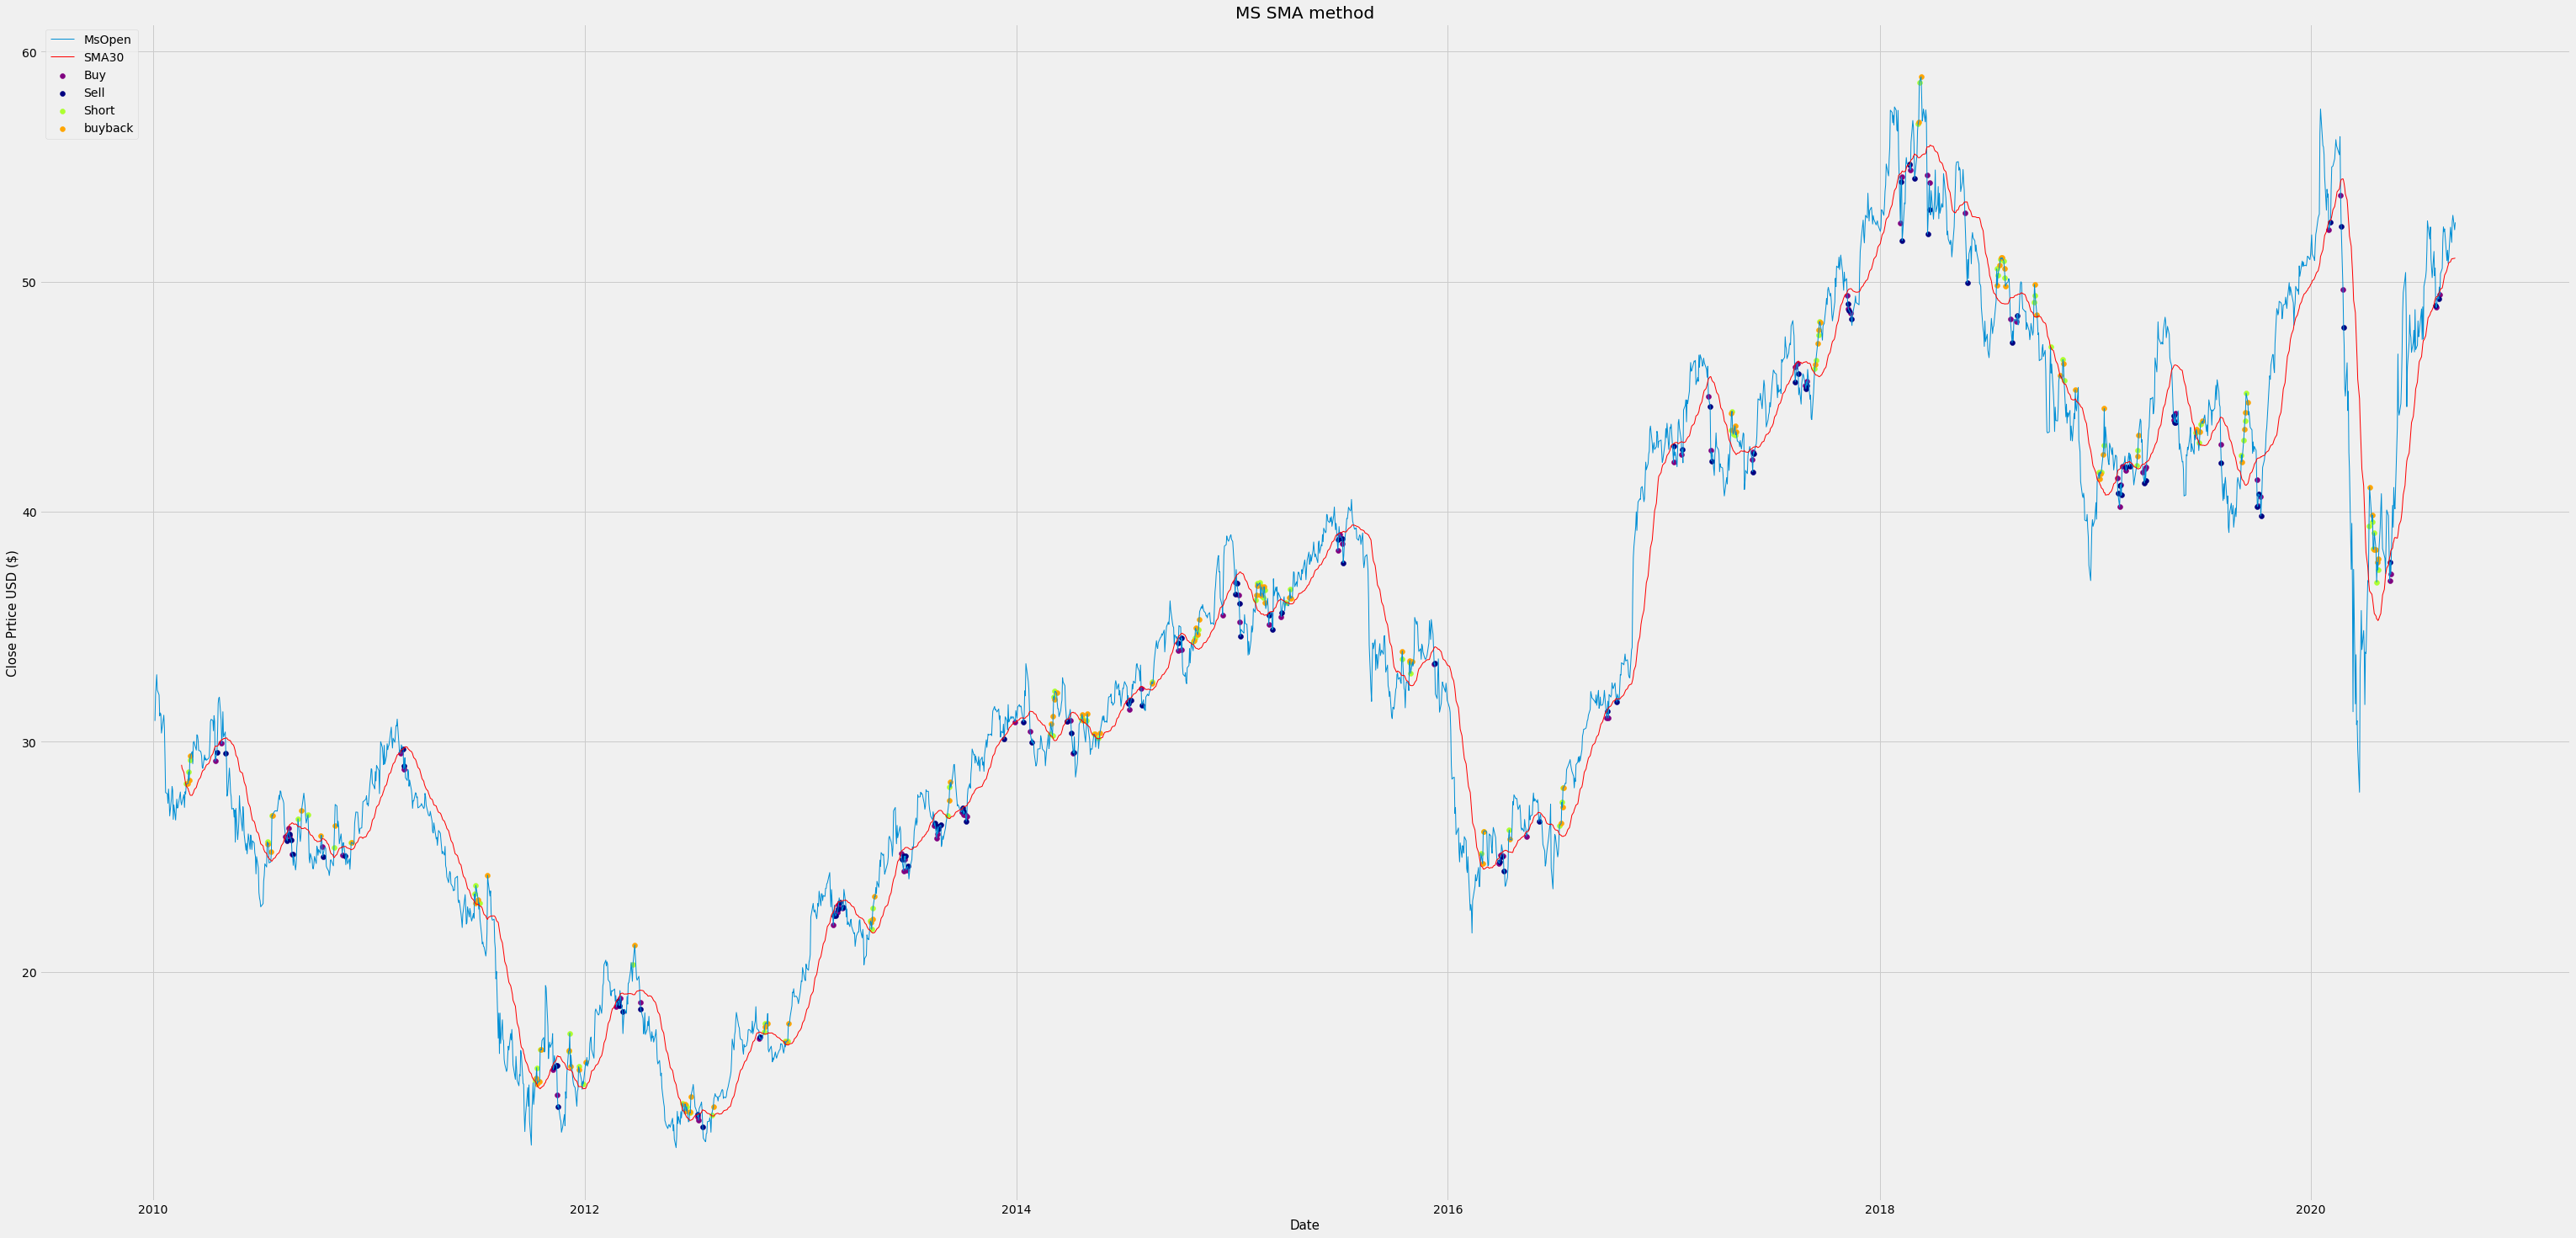

In [32]:
plt.figure(figsize=(16*3,8*3))
plt.title("MS SMA method")

plt.plot(dfMSSMA["Close"],linewidth=1)
plt.plot(dfMSSMA["SMA30"],linewidth=1, color="red")

plt.scatter(dfMSSMA.index,dfMSSMA["30Buy"], color="purple")
plt.scatter(dfMSSMA.index,dfMSSMA["30Sell"], color="navy")
plt.scatter(dfMSSMA.index,dfMSSMA["30Short"], color="greenyellow")
plt.scatter(dfMSSMA.index,dfMSSMA["30Buyback"], color="orange")

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA30","Buy", "Sell", "Short", "buyback"], loc="upper left")

I won't zoom in again, as we have already seen the principle and you can't see much anyways

In [33]:
def createLog30(df):# creating a shortened log of the price when we bought/sold...
    bought=[df.Close[x] for x in df.index if not math.isnan(df["30Buy"][x])]
    sold=[df.Close[x] for x in df.index if not math.isnan(df["30Sell"][x])]
    shorted=[df.Close[x] for x in df.index if not math.isnan(df["30Short"][x])]
    boughtback=[df.Close[x] for x in df.index if not math.isnan(df["30Buyback"][x])]
    return bought, sold, shorted, boughtback

In [34]:
MSBought, MSSold, MSShorted, MSBoughtback=createLog30(dfMSSMA)

In [35]:
made=0
for i in range(len(MSSold)):
    made+=(MSBought[i]-MSSold[i])
made # the amount we gained/lost

-0.2499990463256836

In [36]:
made2=0
for i in range(len(MSBoughtback)):
    made2+=(MSShorted[i]-MSBoughtback[i])
made2 # the amount we gained/lost

-10.60002326965332

In [37]:
netgain=made+made2
print("we gained {:.2f} $ using this method".format(netgain))

we gained -10.85 $ using this method


If we use 30 days for the SMA the results get even worse. But this is  just 1 example, now we test on the other stocks.

# 1.2 Apple

In [38]:
dfASMA=dfA.copy()
for i in range(30+1,dfASMA.shape[0]):#SMA with 15 days
    dfASMA.loc[dfASMA.index[i],'SMA15'] = ((dfASMA.Close[i-15:i].sum())/15)
for i in range(30+1,dfASMA.shape[0]):#SMA with 30 days
    dfASMA.loc[dfASMA.index[i],'SMA30'] = ((dfASMA.Close[i-30:i].sum())/30)
dfASMA.head()

,Close,SMA15,SMA30
Date,,,
2010-01-04,7.643214,NaN,NaN
2010-01-05,7.656428,NaN,NaN
2010-01-06,7.534643,NaN,NaN
2010-01-07,7.520714,NaN,NaN
2010-01-08,7.570714,NaN,NaN


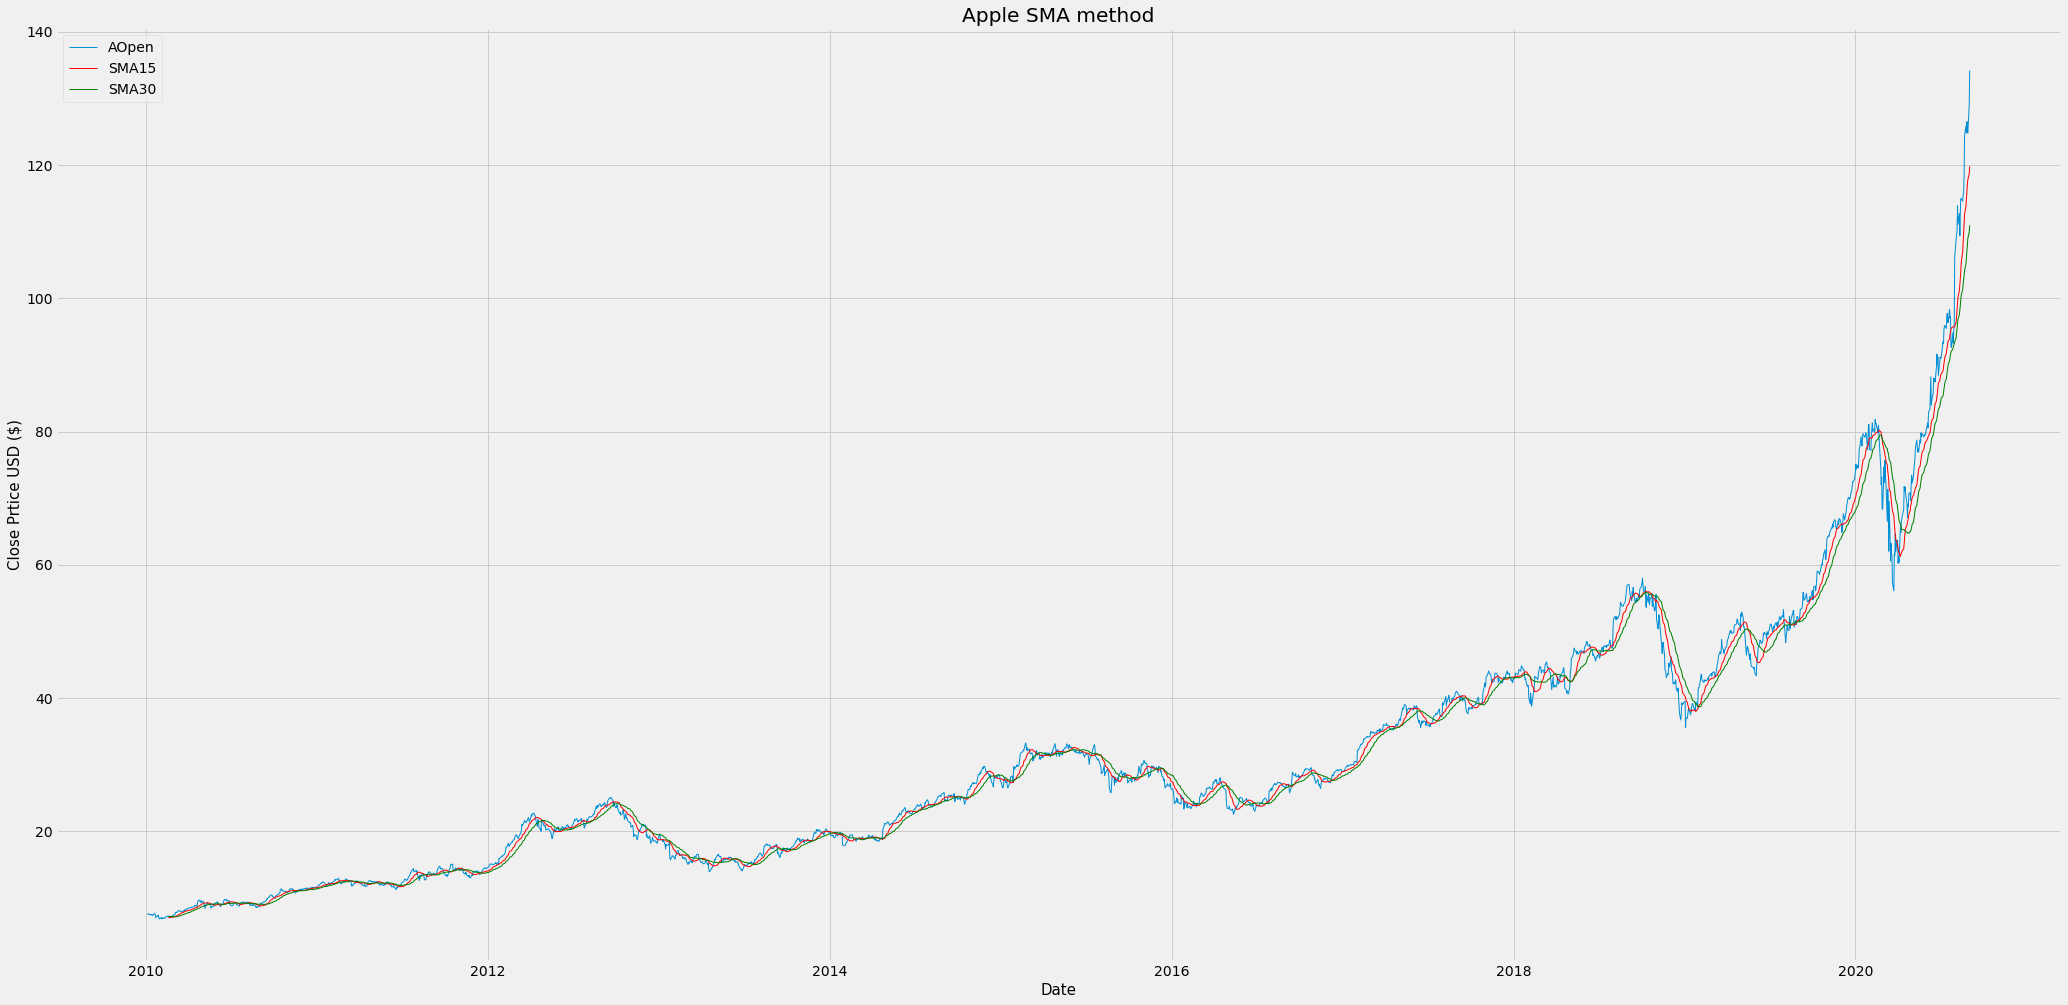

In [39]:
plt.figure(figsize=(16*2,8*2))
plt.title("Apple SMA method")
plt.plot(dfASMA["Close"],linewidth=1)
plt.plot(dfASMA["SMA15"],linewidth=1, color="red")
plt.plot(dfASMA["SMA30"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["AOpen","SMA15","SMA30"], loc="upper left") 

# SMA15

In [40]:
ASMA15Buy, ASMA15Sell, ASMA15Short, ASMA15Buyback=SMA15BuyAlg(dfASMA)
dfASMA["15Buy"]=ASMA15Buy
dfASMA["15Sell"]=ASMA15Sell
dfASMA["15Short"]=ASMA15Short
dfASMA["15Buyback"]=ASMA15Buyback
dfASMA.head()

,Close,SMA15,SMA30,15Buy,15Sell,15Short,15Buyback
Date,,,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.656428,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,7.534643,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,7.520714,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,7.570714,NaN,NaN,NaN,NaN,NaN,NaN


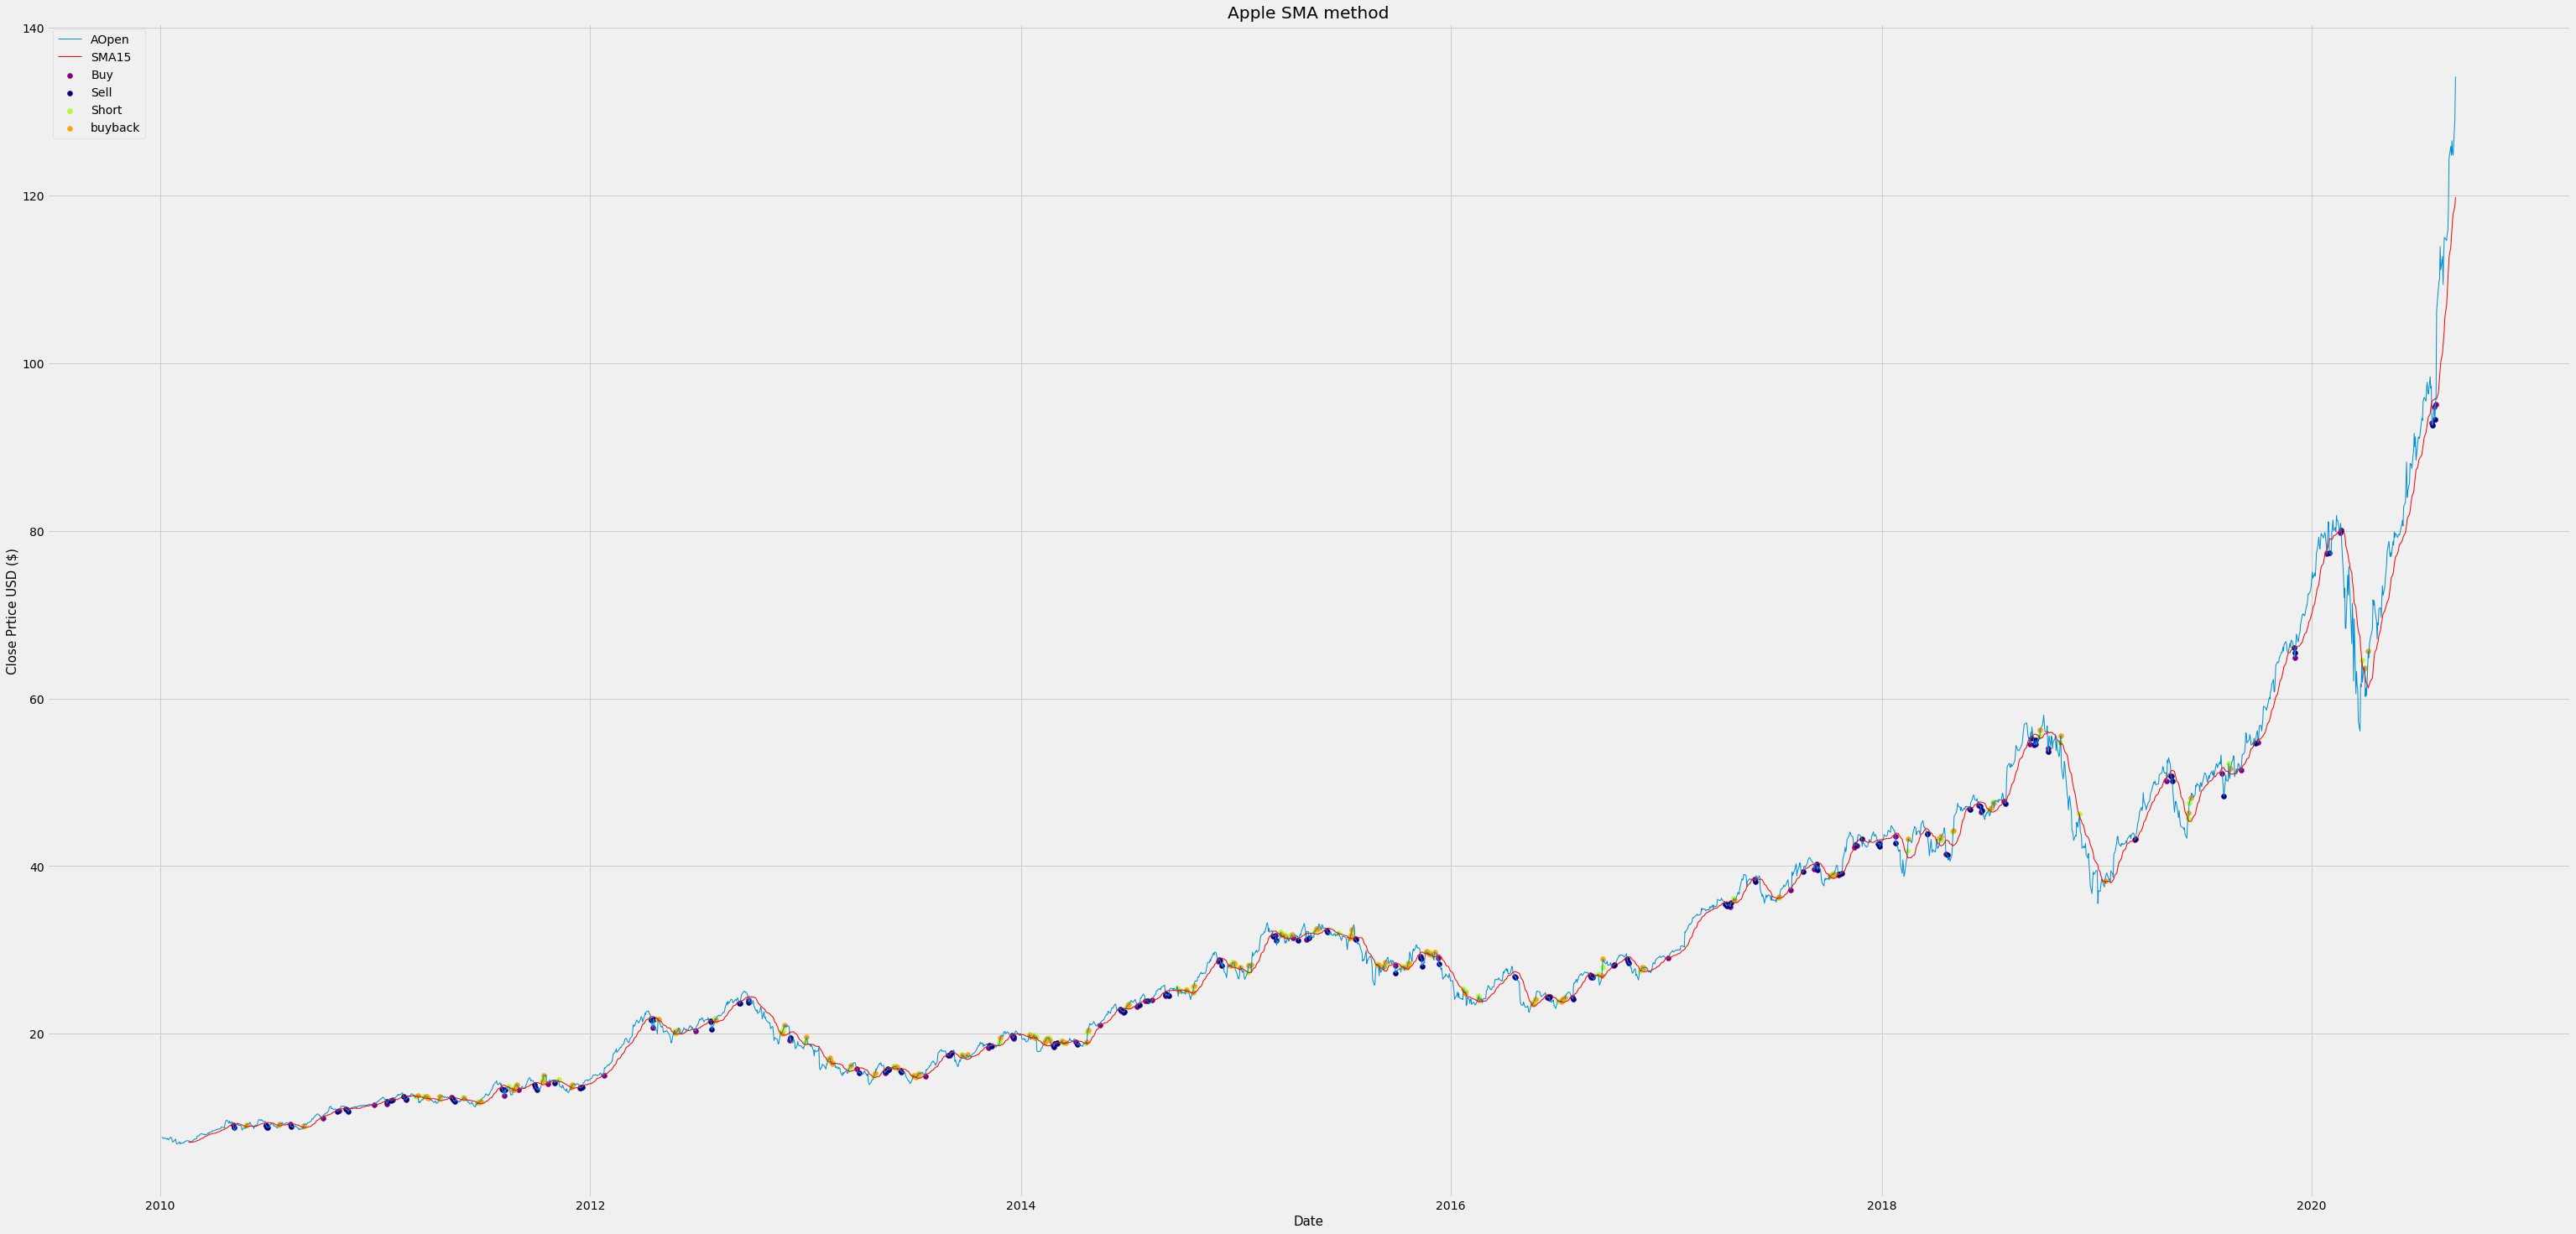

In [41]:
plt.figure(figsize=(16*3,8*3))
plt.title("Apple SMA method")

plt.plot(dfASMA["Close"],linewidth=1)
plt.plot(dfASMA["SMA15"],linewidth=1, color="red")

plt.scatter(dfASMA.index,dfASMA["15Buy"], color="purple")
plt.scatter(dfASMA.index,dfASMA["15Sell"], color="navy")
plt.scatter(dfASMA.index,dfASMA["15Short"], color="greenyellow")
plt.scatter(dfASMA.index,dfASMA["15Buyback"], color="orange")

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["AOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

We wont zoom in on every part again, just 1 as example

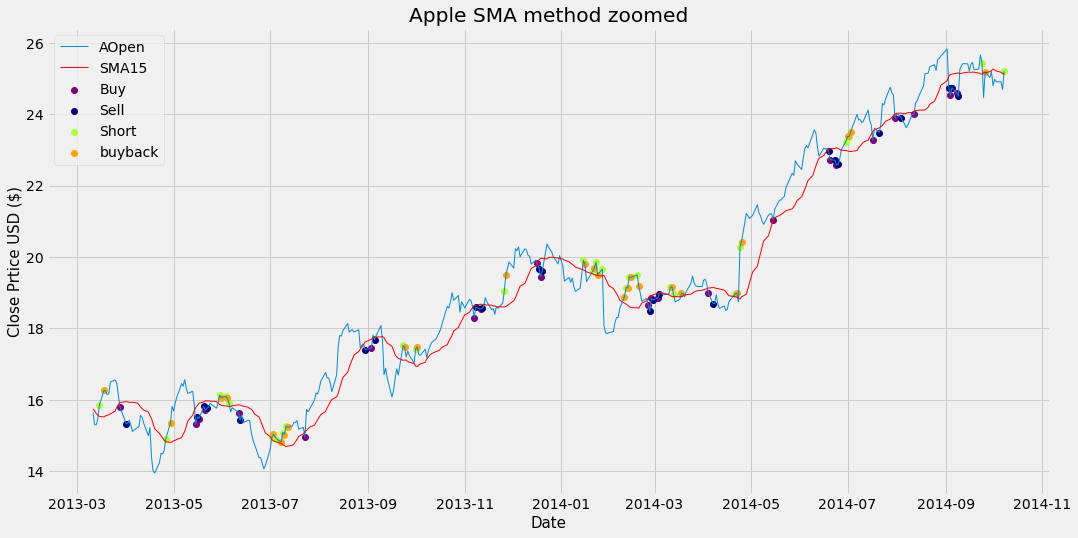

In [42]:
plt.figure(figsize=(16,8))
plt.title("Apple SMA method zoomed")

plt.plot(dfASMA["Close"][800:1200],linewidth=1)
plt.plot(dfASMA["SMA15"][800:1200],linewidth=1, color="red")

plt.scatter(dfASMA.index[800:1200],dfASMA["15Buy"][800:1200], color="purple",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["15Sell"][800:1200], color="navy",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["15Short"][800:1200], color="greenyellow",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["15Buyback"][800:1200], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["AOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

In [43]:
ABought, ASold, AShorted, ABoughtback=createLog15(dfASMA)

In [44]:
made=0
for i in range(len(ASold)):
    made+=(ABought[i]-ASold[i])
made # the amount we gained/lost

-31.827499389648438

In [45]:
made2=0
for i in range(len(ABoughtback)):
    made2+=(AShorted[i]-ABoughtback[i])
made2 # the amount we gained/lost

-46.71893119812012

In [46]:
netgain=made+made2
print("we gained {:.2f} $ using this method with Apple.".format(netgain))

we gained -78.55 $ using this method with Apple.


# SMA30

In [47]:
ASMA30Buy, ASMA30Sell, ASMA30Short, ASMA30Buyback=SMA30BuyAlg(dfASMA)
dfASMA["30Buy"]=ASMA30Buy
dfASMA["30Sell"]=ASMA30Sell
dfASMA["30Short"]=ASMA30Short
dfASMA["30Buyback"]=ASMA30Buyback

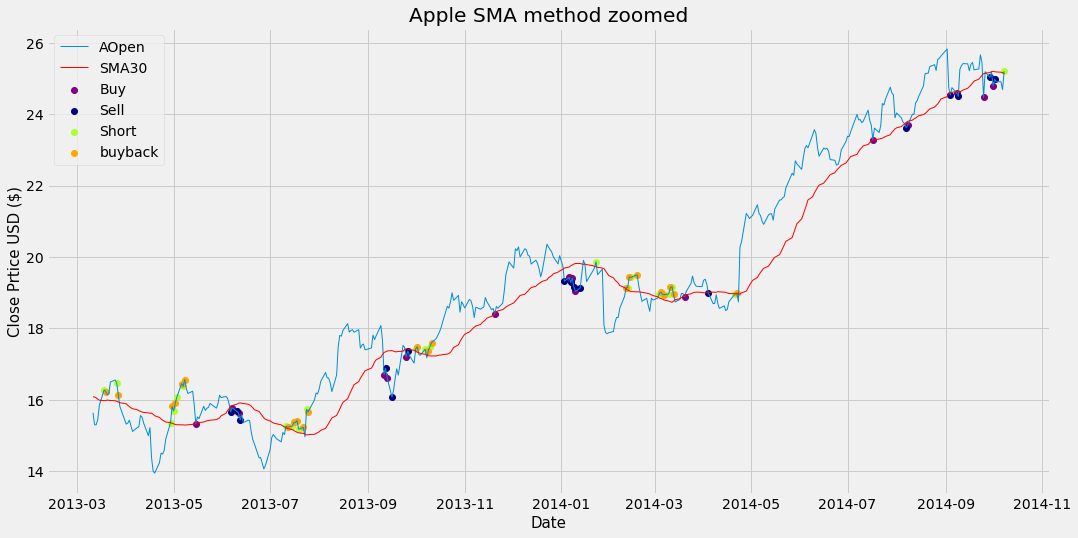

In [48]:
plt.figure(figsize=(16,8))
plt.title("Apple SMA method zoomed")

plt.plot(dfASMA["Close"][800:1200],linewidth=1)
plt.plot(dfASMA["SMA30"][800:1200],linewidth=1, color="red")

plt.scatter(dfASMA.index[800:1200],dfASMA["30Buy"][800:1200], color="purple",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["30Sell"][800:1200], color="navy",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["30Short"][800:1200], color="greenyellow",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["30Buyback"][800:1200], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["AOpen","SMA30","Buy", "Sell", "Short", "buyback"], loc="upper left")

In [49]:
ABought, ASold, AShorted, ABoughtback=createLog30(dfASMA)
made=0
for i in range(len(ASold)):
    made+=(ABought[i]-ASold[i])
made # the amount we gained/lost

-2.20001220703125

In [50]:
made2=0
for i in range(len(ABoughtback)):
    made2+=(AShorted[i]-ABoughtback[i])
made2 # the amount we gained/lost

-71.53783750534058

In [51]:
netgain=made+made2
print("we gained {:.2f} $ using this method with Apple.".format(netgain))

we gained -73.74 $ using this method with Apple.


similar to SMA15

# 1.3 HP

In [52]:
dfHPSMA=dfHP.copy()
for i in range(30+1,dfHPSMA.shape[0]):#SMA with 15 days
    dfHPSMA.loc[dfHPSMA.index[i],'SMA15'] = ((dfHPSMA.Close[i-15:i].sum())/15)
for i in range(30+1,dfASMA.shape[0]):#SMA with 30 days
    dfHPSMA.loc[dfHPSMA.index[i],'SMA30'] = ((dfHPSMA.Close[i-30:i].sum())/30)
dfHPSMA.head()

,Close,SMA15,SMA30
Date,,,
2010-01-04,41.980000,NaN,NaN
2010-01-05,44.430000,NaN,NaN
2010-01-06,46.049999,NaN,NaN
2010-01-07,46.340000,NaN,NaN
2010-01-08,48.000000,NaN,NaN


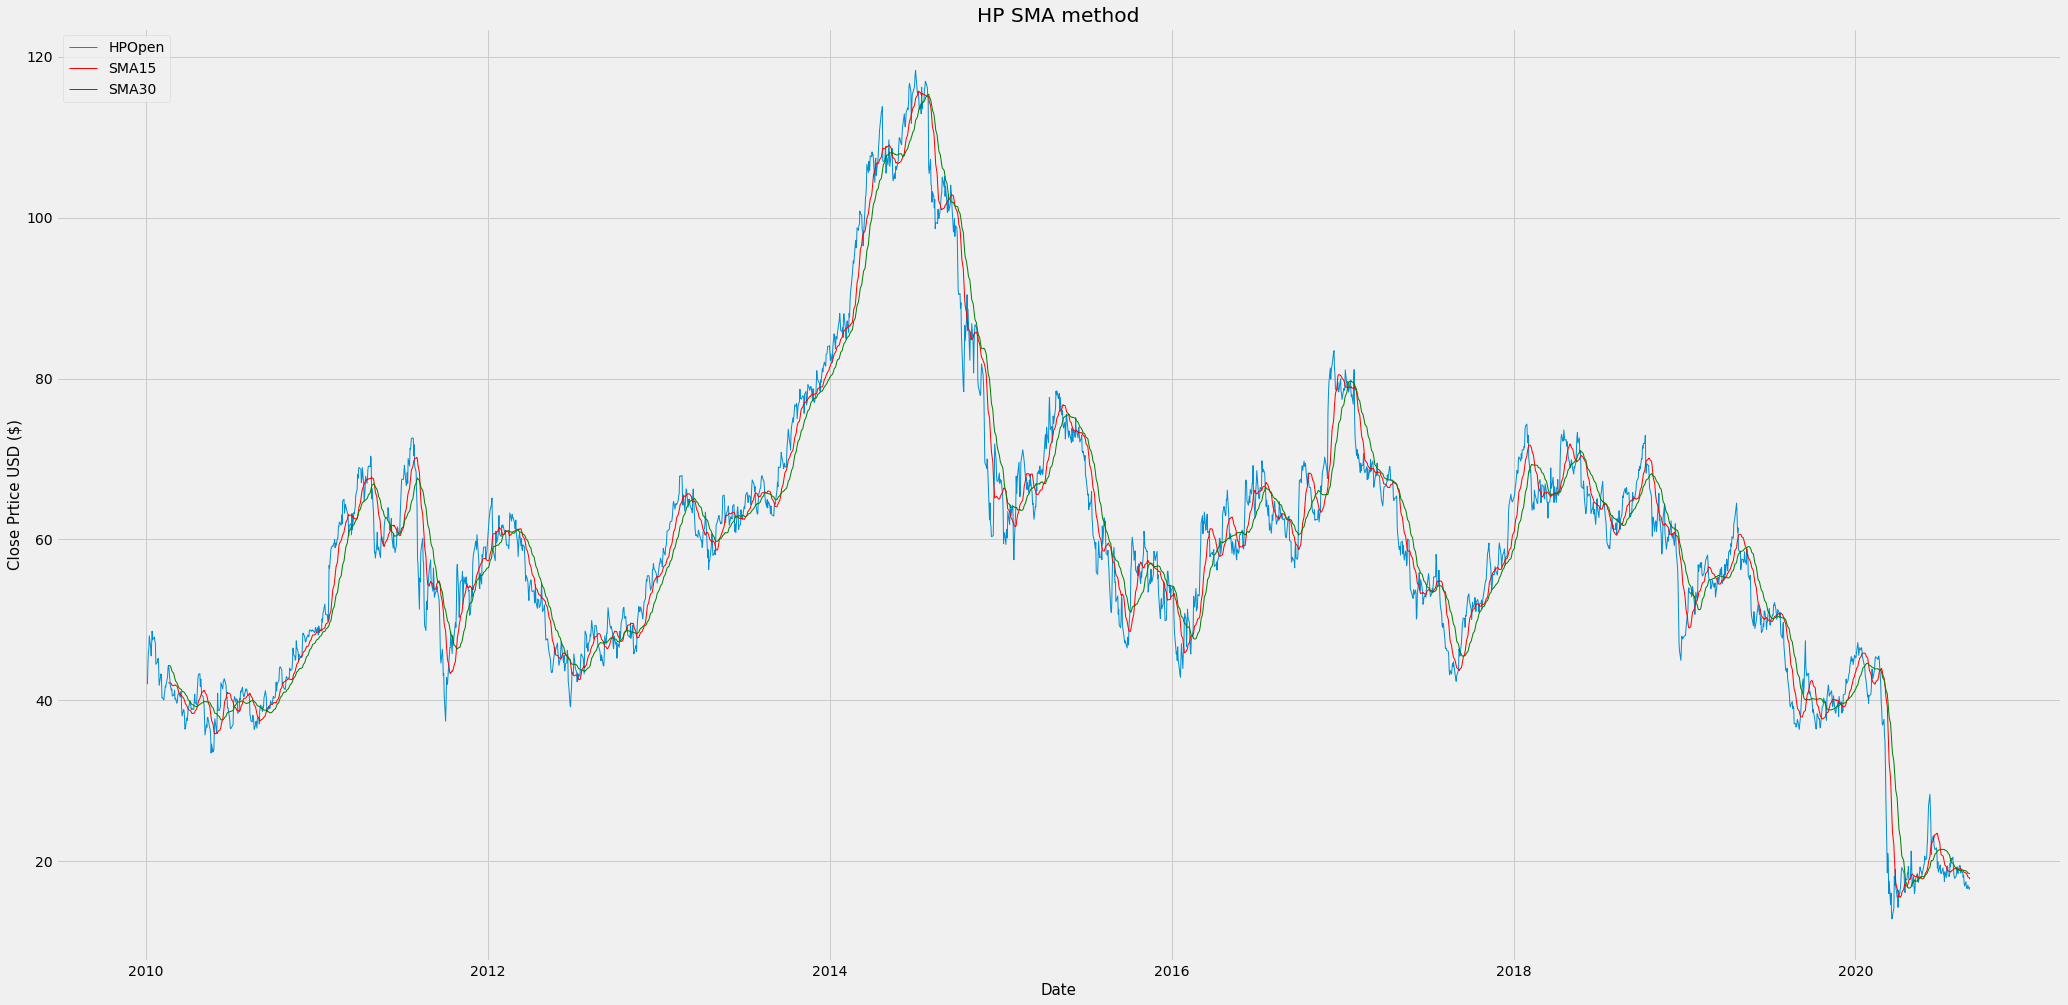

In [53]:
plt.figure(figsize=(16*2,8*2))
plt.title("HP SMA method")
plt.plot(dfHPSMA["Close"],linewidth=1)
plt.plot(dfHPSMA["SMA15"],linewidth=1, color="red")
plt.plot(dfHPSMA["SMA30"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["HPOpen","SMA15","SMA30"], loc="upper left") 

# SMA15

In [54]:
HPSMA15Buy, HPSMA15Sell, HPSMA15Short, HPSMA15Buyback=SMA15BuyAlg(dfHPSMA)
dfHPSMA["15Buy"]=HPSMA15Buy
dfHPSMA["15Sell"]=HPSMA15Sell
dfHPSMA["15Short"]=HPSMA15Short
dfHPSMA["15Buyback"]=HPSMA15Buyback
dfHPSMA.head()

,Close,SMA15,SMA30,15Buy,15Sell,15Short,15Buyback
Date,,,,,,,
2010-01-04,41.980000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,44.430000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,46.049999,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,46.340000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,48.000000,NaN,NaN,NaN,NaN,NaN,NaN


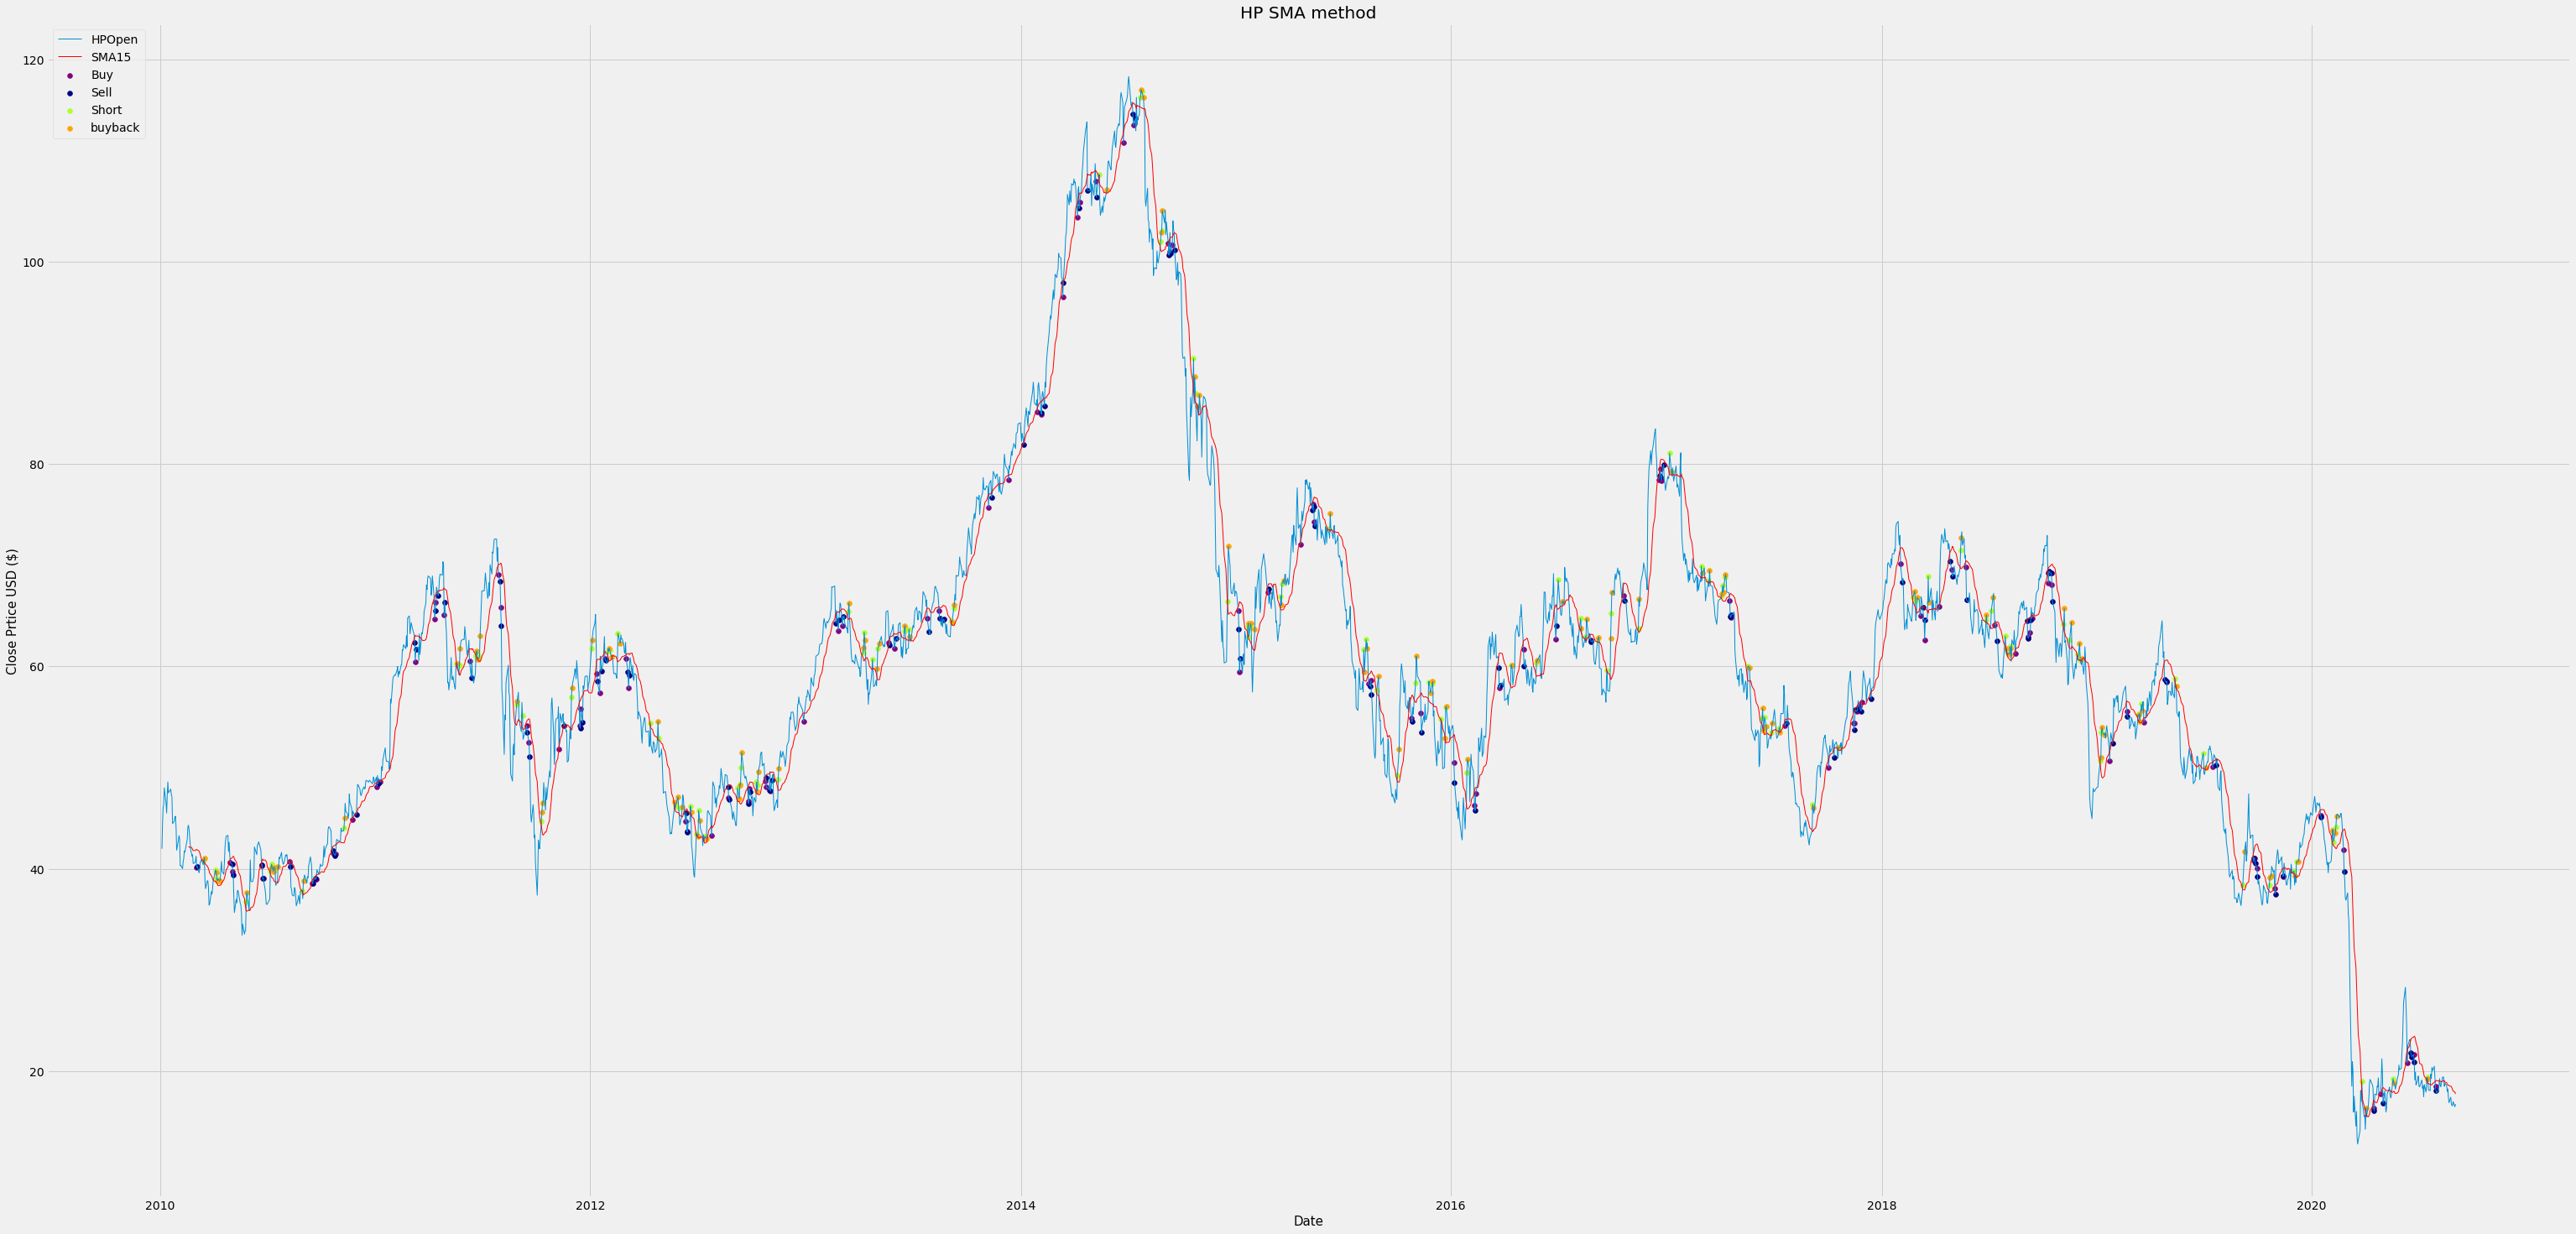

In [55]:
plt.figure(figsize=(16*3,8*3))
plt.title("HP SMA method")

plt.plot(dfHPSMA["Close"],linewidth=1)
plt.plot(dfHPSMA["SMA15"],linewidth=1, color="red")

plt.scatter(dfHPSMA.index,dfHPSMA["15Buy"], color="purple")
plt.scatter(dfHPSMA.index,dfHPSMA["15Sell"], color="navy")
plt.scatter(dfHPSMA.index,dfHPSMA["15Short"], color="greenyellow")
plt.scatter(dfHPSMA.index,dfHPSMA["15Buyback"], color="orange")

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["HPOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

We wont zoom in on every part again, just 1 as example

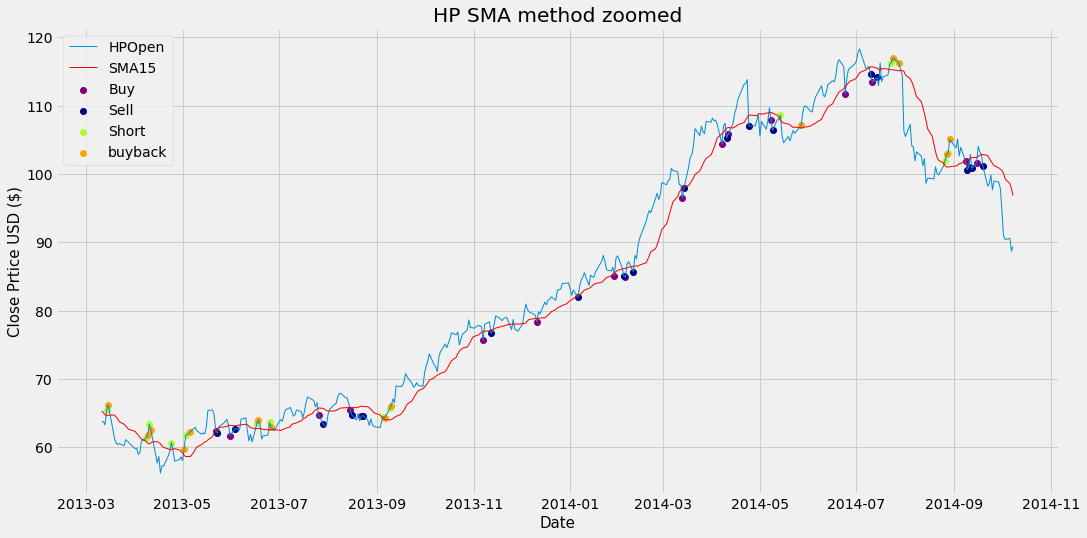

In [56]:
plt.figure(figsize=(16,8))
plt.title("HP SMA method zoomed")

plt.plot(dfHPSMA["Close"][800:1200],linewidth=1)
plt.plot(dfHPSMA["SMA15"][800:1200],linewidth=1, color="red")

plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["15Buy"][800:1200], color="purple",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["15Sell"][800:1200], color="navy",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["15Short"][800:1200], color="greenyellow",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["15Buyback"][800:1200], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["HPOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

In [57]:
HPBought, HPSold, HPShorted, HPBoughtback=createLog15(dfHPSMA)

In [58]:
made=0
for i in range(len(HPSold)):
    made+=(HPBought[i]-HPSold[i])
made # the amount we gained/lost

-36.90994453430176

In [59]:
made2=0
for i in range(len(HPBoughtback)):
    made2+=(HPShorted[i]-HPBoughtback[i])
made2 # the amount we gained/lost

14.559995651245117

In [60]:
netgain=made+made2
print("we gained {:.2f} $ using this method with HP.".format(netgain))

we gained -22.35 $ using this method with HP.


# SMA30

In [61]:
HPSMA30Buy, HPSMA30Sell, HPSMA30Short, HPSMA30Buyback=SMA30BuyAlg(dfHPSMA)
dfHPSMA["30Buy"]=HPSMA30Buy
dfHPSMA["30Sell"]=HPSMA30Sell
dfHPSMA["30Short"]=HPSMA30Short
dfHPSMA["30Buyback"]=HPSMA30Buyback

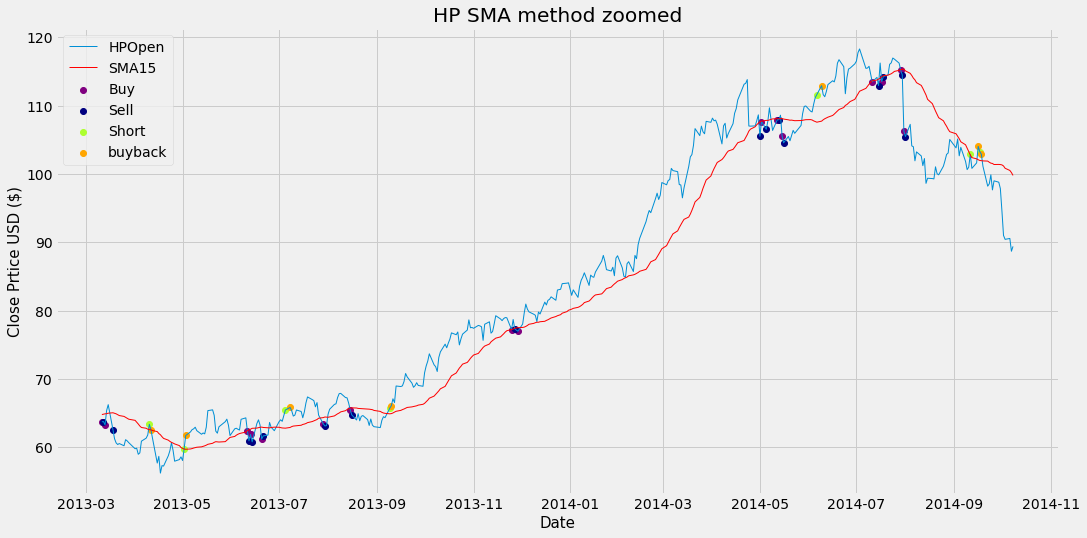

In [62]:
plt.figure(figsize=(16,8))
plt.title("HP SMA method zoomed")

plt.plot(dfHPSMA["Close"][800:1200],linewidth=1)
plt.plot(dfHPSMA["SMA30"][800:1200],linewidth=1, color="red")

plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["30Buy"][800:1200], color="purple",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["30Sell"][800:1200], color="navy",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["30Short"][800:1200], color="greenyellow",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["30Buyback"][800:1200], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["HPOpen","SMA30","Buy", "Sell", "Short", "buyback"], loc="upper left")

In [63]:
HPBought, HPSold, HPShorted, HPBoughtback=createLog30(dfHPSMA)
made=0
for i in range(len(HPSold)):
    made+=(HPBought[i]-HPSold[i])
made # the amount we gained/lost

-29.48997974395752

In [64]:
made2=0
for i in range(len(HPBoughtback)):
    made2+=(HPShorted[i]-HPBoughtback[i])
made2 # the amount we gained/lost

1.5200119018554688

In [65]:
netgain=made+made2
print("we gained {:.2f} $ using this method with HP.".format(netgain))

we gained -27.97 $ using this method with HP.


# 1.4 Analysis/Feedback

This method, or my execution of it does not seem to work at all. Especially if we add the costs for the transaction the method is a waste of time and money.<br>
It is possible, that I messed up some lines, but the results are not very good. <br>
I would not recommend this Method to anyone. Obviously it is not a very complex one(see source) and I did not expect much of it.